<a class="anchor" id="TOC"></a>
# **Table of Contents**

>[Table of Contents](#TOC)

>[1. Introduction](#Introduction)

>[2. Set up, import data, and prepare data](#setup)

>[3. Initial Exploration of Dataset](#initexp)

>>[3.1 Summary of the DataFrame structure](#initexp1)

>>[3.2 Descriptive statistics for each numerical column](#initexp2)

>>[3.3. Replace XNA values with NA for imputation](#initexp3)

>>[3.4 Counts and Percentages of the TARGET variable's two classes](#initexp4)

>[4. Vizualizing Target Variable](#vis)

>>[4.1 Target Variable Accuracy](#vis1)

>>[4.2 Distribution plot of 'CODE_GENDER' based on 'TARGET](#vis2)

>>[4.3 Correlations between the target variable and predictors](#vis3)

>>[4.4 Top 10 positive and negative correlations to TARGET variable](#vis4)

>>[4.5 Removing TARGET variable from the plot](#vis5)

>>[4.6 Heat Map for the top 5 Positive and Negative Correlated Variables](#vis6)

>[5. Missing data](#missing)

>>[5.1 Dropping columns with missing data](#missing1)

>>[5.2 Finding columns having <15% null values](#missing2)

>>[5.3  Insight of missing columns having <15%](#missing3)

>[6. Numerical and Categorical Variables](#numcat)

>>[6.1 Differentiating Numerical and Categorical Column](#numcat1)

>>[6.2 Separating Categorical Data for Independent Imputation and Outlier Treatment of Numerical Data](#numcat2)

>>[6.3 Identifying Numeric Columns that Represent Categorical Data (Coded To Numbers)](#numcat3)

>>[6.4 Creating a DataFrame for Categorical Columns](#numcat4)

>>[6.5 Creating a DataFrame for Numerical Columns](#numcat5)

>>[6.6 Calculating Variance for Numerical Data](#numcat6)

>>[6.7 Performing Missing Value Imputation](#numcat7)

>[7. Exploratory Data Analysis](#eda)

>>[7.1 Visualization between Family Status and the Target Variable](#eda1)

>>[7.2 Visualization between Housing type and the Target Variable](#eda2)

>>[7.3 Relationship between Income Type and Loan Taken with the Target Varibale (Violin Plot)](#eda3)

>>[7.4 Payment Capability based on Loan and Mortgage](#eda4)

>[8. Detecting Outliers](#kurt)

>>[8.1 Visualizing Outliers in Numerical Columns using Boxplots](#kurt1)

>[9. Treatment of Outliers](#outlier)

>[10 Join application_{train|test}.csv with transactional data](#bureau)

>>[10.1 Reading in Data](#bureau1)

>>[10.2 Observing the Bureau Dataset](#bureau2)

>>[10.3 Joining Bureau Data with Train Data](#bureau3)

>[11. Exploring The Joined Transactional Data](#edabureau)

>>[11.1 Shape of New Dataframe](#edabureau1)

>>[11.2 Observing Numerical Columns](#edabureau2)

>>[11.3 Observing Categorical Columns](#edabureau3)

>[12. Questions](#questions)

>[13. Results](#results)

>[14. Summary](#summary)

>[15. Contributions](#contrib)

>>[15.1 Daryle Bilog](#contrib1)

>>[15.2 Joe Sarnello](#contrib2)

>>[15.3 Sanskriti Bhargava](#contrib3)

>>[15.4 Vinay Kumar Vascuri](#contrib4)



<a class="anchor" id="Introduction"></a>
# **1. Introduction**

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including Demographic,Financial and property information--to predict their clients' repayment abilities.Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

The ultimate goal of the Home Credit project is to develop a robust predictive model that accurately identifies individuals who are likely to default on loan payments. This model can assist Home Credit in making informed decisions, reducing default risk, and improving loan approval processes.

<a class="anchor" id="setup"></a>
# **2. Set up, import data, and prepare data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import chardet
import seaborn as sns
import matplotlib.patches as mp
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/home-credit-default-risk') # changing the default directory


<a class="anchor" id="initexp"></a>

# **3. Initial Exploration of Dataset**

In [4]:
df = pd.read_csv("application_train.csv")
df_bureau = pd.read_csv("bureau.csv")
df.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


<a class="anchor" id="initexp1"></a>

## *3.1 Summary of the DataFrame structure*


In [6]:
df.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

<a class="anchor" id="initexp2"></a>

## *3.2 Descriptive statistics for each numerical column*


In [7]:
 df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<a class="anchor" id="initexp3"></a>

## *3.3. Replace XNA values with NA for imputation*


In [8]:
df['CODE_GENDER'].value_counts()


#there are 4 xna(unknown values)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [9]:
print('maximum frequency data :', df['CODE_GENDER'].describe().top)


maximum frequency data : F


Since, Female is having the majority and only 2 rows are having XNA values, we can impute those with Gender 'F' as there will be no impact on the dataset. Also there will no impact if we drop those rows.

In [10]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', None)

df[df['CODE_GENDER']=='XNA'].shape

(0, 122)

<a class="anchor" id="initexp4"></a>

## *3.4 Counts and Percentages of the TARGET variable's two classes*

In [11]:
# Count the occurrences of each class in the training dataset
class_counts = df['TARGET'].value_counts()

# Calculate the percentage of each class
class_percentages = class_counts / len(df) * 100

# Print the class counts and percentages
print(class_counts)
print(class_percentages)

0    282686
1     24825
Name: TARGET, dtype: int64
0    91.927118
1     8.072882
Name: TARGET, dtype: float64


*In this case, we observe a significant disparity in the counts and percentages between the two classes. Class 0 (the majority class) has a much higher count and percentage compared to Class 1 (the minority class).*

*Based on these numbers, we can conclude that the TARGET variable is unbalanced because the majority class (Class 0) accounts for approximately 91.93% of the instances, while the minority class (Class 1) represents only around 8.07% of the instances.*

<a class="anchor" id="vis"></a>

# **4. Vizualizing Target Variable**


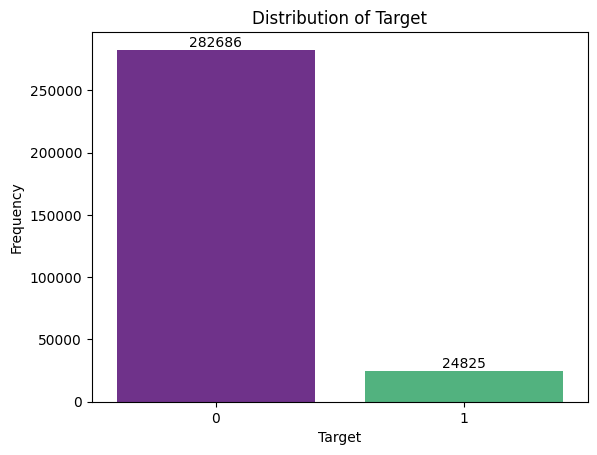

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = {0: '#742399', 1: '#42c27e'}

ax = sns.countplot(x='TARGET', data=df, palette=palette)

plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')

# Add count values as annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()


<a class="anchor" id="vis1"></a>

## *4.1 Target Variable Accuracy*

In [13]:
# Calculate the accuracy of the majority class classifier
accuracy_majority = class_percentages.max() / 100

print(f"Accuracy of the majority class classifier: {accuracy_majority}")

Accuracy of the majority class classifier: 0.9192711805431351


*Accuracy of the majority class classifier: **0.9192711805431351**.*

<a class="anchor" id="vis2"></a>

## *4.2 Distribution plot of 'CODE_GENDER' based on 'TARGET*

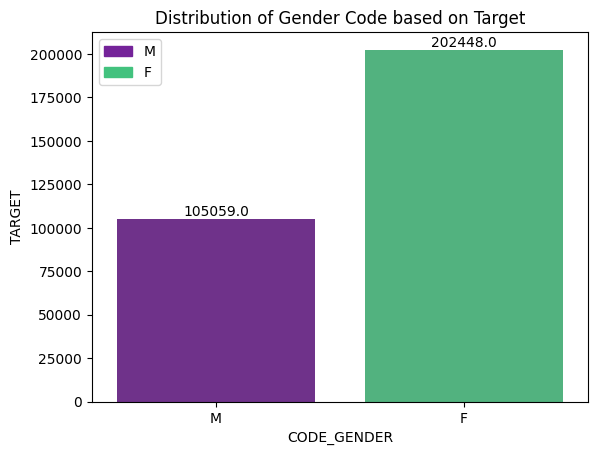

In [14]:
palette = {'M': '#742399', 'F': '#42c27e'}

gender = sns.countplot(x='CODE_GENDER', data=df, palette = palette)
for p in gender.patches:
    gender.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Distribution of Gender Code based on Target')
plt.xlabel('CODE_GENDER')
plt.ylabel('TARGET')
plt.legend(handles=[mp.Patch(color='#742399', label='M'), mp.Patch(color='#42c27e', label='F')])
plt.show()

<a class="anchor" id="vis3"></a>

## *4.3 Correlations between the target variable and predictors*

In [15]:
# Calculate the correlations between the target variable and predictors
correlation_matrix = df.corr()['TARGET'].sort_values(ascending=False)

print(correlation_matrix)

<ipython-input-15-2e53749f0899>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()['TARGET'].sort_values(ascending=False)


TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 106, dtype: float64


*The above output shows the correlation between the predictors and the target variable **"TARGET"** in the Home Credit Default Risk dataset. The target variable is labeled as **"TARGET"** in the output. The closer the correlation coefficient is to **1**, the stronger the positive correlation between the two variables. The closer the correlation coefficient is to **-1**, the stronger the negative correlation between the two variables. A correlation coefficient of **0** indicates no correlation between the two variables.*

*From the below output, we can conclude that the predictors with the strongest negative correlation with the **"TARGET"** variable are **EXT_SOURCE_3**, **EXT_SOURCE_2**, and **EXT_SOURCE_1**. This means that as the values of these predictors increase, the probability of defaulting on a loan decreases.
The predictors with the strongest positive correlation with the **"TARGET"** variable are **DAYS_LAST_PHONE_CHANGE**, **REGION_RATING_CLIENT**, and **REGION_RATING_CLIENT_W_CITY**. This means that as the values of these predictors increase, the probability of defaulting on a loan increases.*

<a class="anchor" id="vis4"></a>

## *4.4 Top 10 positive and negative correlations to TARGET variable*

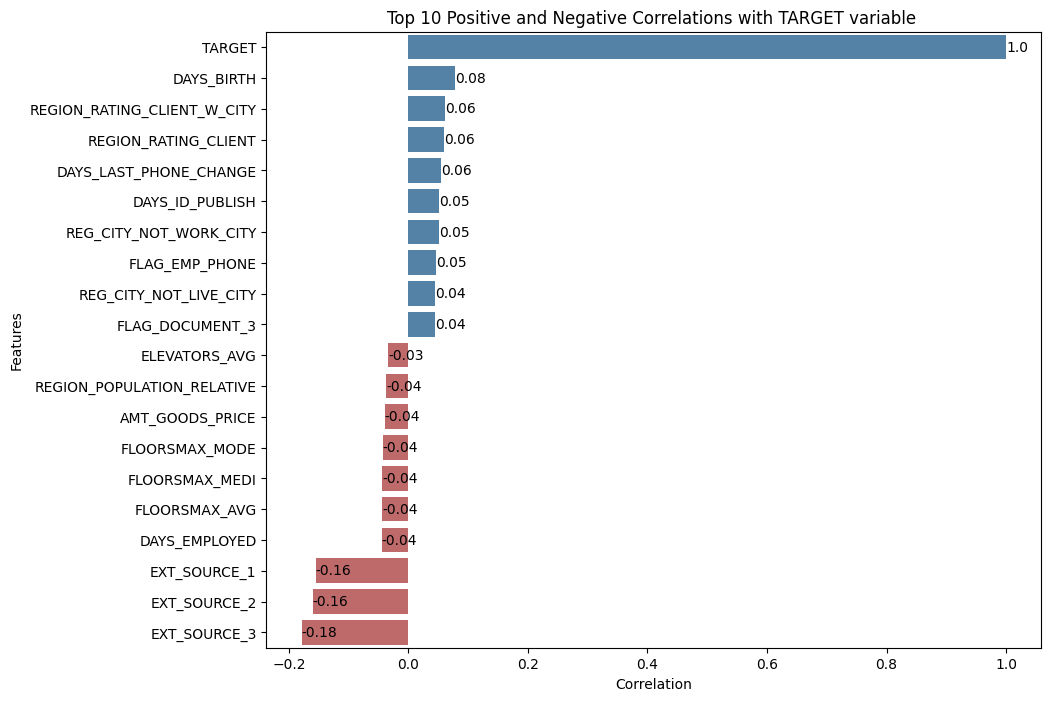

In [16]:
# Visualize the top 10 positive and negative correlations
plt.figure(figsize=(10, 8))
top_correlations = pd.concat([correlation_matrix.head(10), correlation_matrix.tail(10)])
colors = ['indianred' if c < 0 else 'steelblue' for c in top_correlations.values]
sns.barplot(x=top_correlations.values, y=top_correlations.index, palette=colors)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Top 10 Positive and Negative Correlations with TARGET variable ')
for i, v in enumerate(top_correlations.values):
    plt.text(v, i, str(round(v, 2)), va='center')
plt.show()

This table shows the top 10 positive and negative correlated varibales to our target variable.

<a class="anchor" id="vis5"></a>

## *4.5 Removing TARGET variable from the plot*

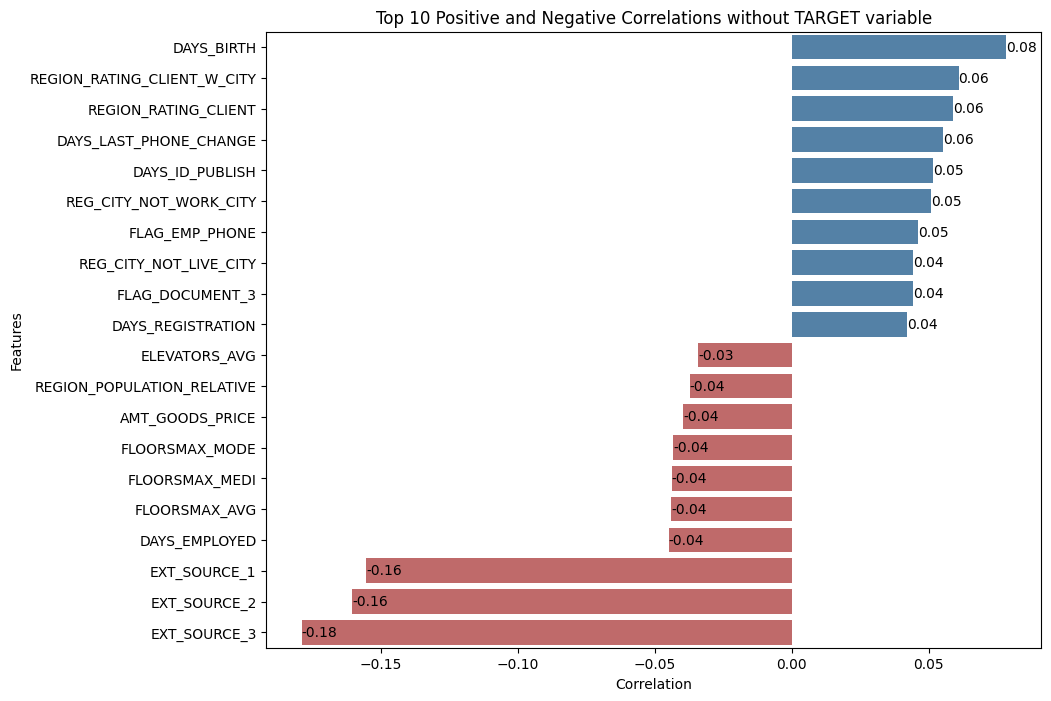

In [17]:
# Visualize the top 10 positive and negative correlations without the target variable
plt.figure(figsize=(10, 8))
top_correlations = pd.concat([correlation_matrix.drop('TARGET').head(10), correlation_matrix.drop('TARGET').tail(10)])
colors = ['indianred' if c < 0 else 'steelblue' for c in top_correlations.values]
sns.barplot(x=top_correlations.values, y=top_correlations.index, palette=colors)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Top 10 Positive and Negative Correlations without TARGET variable')
for i, v in enumerate(top_correlations.values):
    plt.text(v, i, str(round(v, 2)), va='center')
plt.show()

This table dropped the Target variable to only show which variables has the highest correlations with it.`

<a class="anchor" id="vis6"></a>

## *4.6 Heat Map for the top 5 Positive and Negative Correlated Variables*

<ipython-input-18-24e41bd6746c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


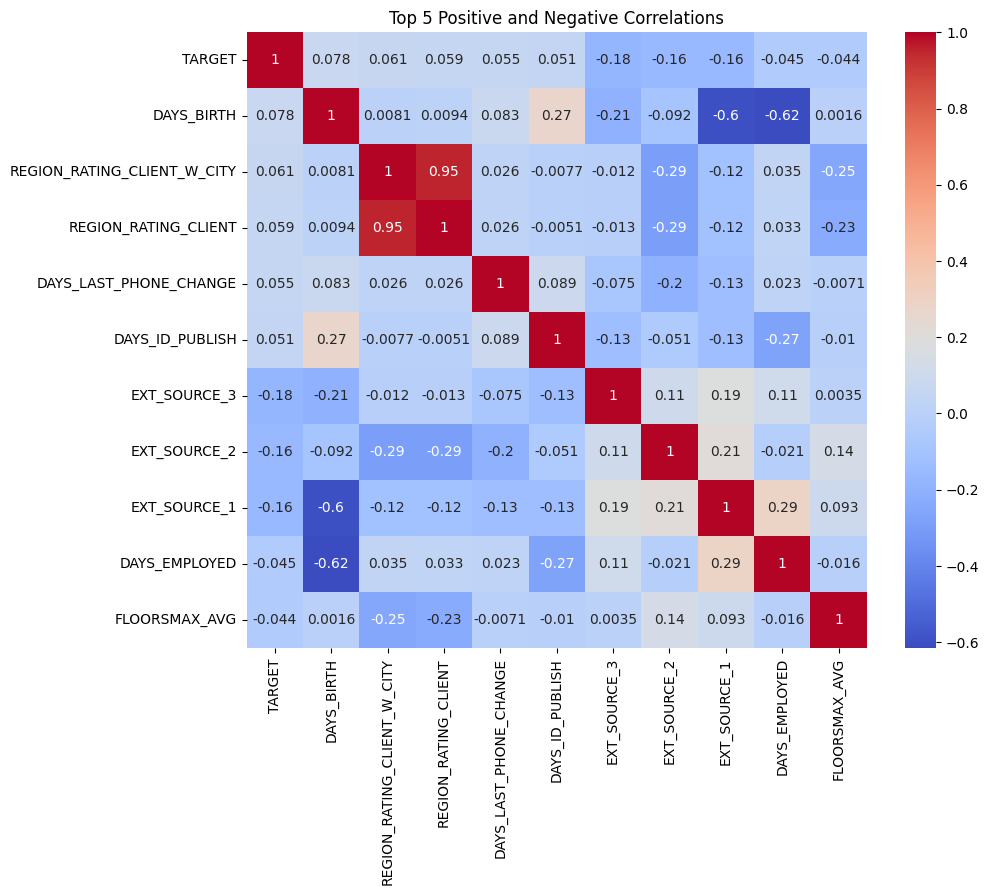

In [18]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Select the top 5 positive and negative correlations
top_positive_corr = correlation_matrix['TARGET'].nlargest(6)
top_negative_corr = correlation_matrix['TARGET'].nsmallest(5)

# Combine the top positive and negative correlations
top_correlations = pd.concat([top_positive_corr, top_negative_corr])

# Filter the correlation matrix based on the top correlations
filtered_correlation_matrix = correlation_matrix.loc[top_correlations.index, top_correlations.index]

# Plot the heatmap of the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Top 5 Positive and Negative Correlations')
plt.show()

The Top 5 Positive correlation variables are:


*   DAYS_BIRTH
*   REGION_RATING_CLIENT_W_CITY
*   REGION_RATING_CLIENT
*   DAYS_LAST_PHONE_CHANGE
*   DAYS_ID_PUBLISH

The Top 5 Negative correlation variables are:

*   FLOORSMAX_AVG
*   DAYS_EMPLOYED
*   EXT_SOURCE_1
*   EXT_SOURCE_2
*   EXT_SOURCE_3

<a class="anchor" id="missing"></a>

# **5. Missing data**


In [19]:
#Total & Percentage of missing data

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(50)



,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [20]:
len(missing_application_train_data[missing_application_train_data.Percent > 50])
#there are a total 41 columns/fields which have more than 50% of missing data.

41

<a class="anchor" id="missing1"></a>

## *5.1 Dropping columns with missing data*



*Dropped columns with more than 50% missing data except for 'OWN_CAR_AGE' because it gives the number of years people owned a car.*


In [21]:
missing_fifty = missing_application_train_data[missing_application_train_data.Percent > 50]
missing_fifty_cols = list(missing_fifty.index)
missing_fifty_cols.remove("OWN_CAR_AGE")
missing_fifty_cols


['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE']

In [22]:
df=df.drop(missing_fifty_cols, axis=1)
df


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.shape

(307511, 82)

*Fill missing values in the corresponding columns with the value of -1 for individuals who do not own cars.*

In [24]:
#filling it with -1 because 0 would reflect cars bought within 12 months
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(-1)

<a class="anchor" id="missing2"></a>

## *5.2 Finding columns having <15% null values*

In [25]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
columns_with_less_than_15_percent_null = missing_data[(missing_data['Percent'] < 15) & (missing_data['Total'] > 0)]
columns_with_less_than_15_percent_null.head(20)

,Total,Percent
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021


<a class="anchor" id="missing3"></a>

## *5.3  Insight of missing columns having <15%*

In [26]:
df[columns_with_less_than_15_percent_null.index].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,306490.000000,306490.000000,306490.000000,306490.000000,3.068510e+05,3.072330e+05,307499.000000,307509.000000,307510.000000
mean,1.899974,0.006402,0.007000,0.034362,0.267395,0.265474,0.143421,1.405292,0.100049,1.422245,5.143927e-01,5.383962e+05,27108.573909,2.152665,-962.858788
std,1.869295,0.083849,0.110757,0.204685,0.916002,0.794056,0.446698,2.379803,0.362291,2.400989,1.910602e-01,3.694465e+05,14493.737315,0.910682,826.808487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,4.050000e+04,1615.500000,1.000000,-4292.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,2.385000e+05,16524.000000,2.000000,-1570.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,4.500000e+05,24903.000000,2.000000,-757.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,6.636171e-01,6.795000e+05,34596.000000,3.000000,-274.000000
max,25.000000,4.000000,9.000000,8.000000,27.000000,261.000000,34.000000,344.000000,24.000000,348.000000,8.549997e-01,4.050000e+06,258025.500000,20.000000,0.000000


In [27]:

df[columns_with_less_than_15_percent_null.index].nunique().sort_values(ascending=False)

EXT_SOURCE_2                  119831
AMT_ANNUITY                    13672
DAYS_LAST_PHONE_CHANGE          3773
AMT_GOODS_PRICE                 1002
OBS_30_CNT_SOCIAL_CIRCLE          33
OBS_60_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
CNT_FAM_MEMBERS                   17
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
NAME_TYPE_SUITE                    7
AMT_REQ_CREDIT_BUREAU_HOUR         5
CODE_GENDER                        2
dtype: int64

<a class="anchor" id="numcat"></a>

# **6. Numerical and Categorical Variables**

<a class="anchor" id="numcat1"></a>

## *6.1 Differentiating Numerical and Categorical Column*

In [28]:
cols = []
for i in list(df.columns):
  cols.append(i)

num_cols = list(df._get_numeric_data().columns) #storing numerical cols in num_cols
num_cols = num_cols[2:]

In [29]:
num_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUME

<a class="anchor" id="numcat2"></a>

## *6.2 Separating Categorical Data for Independent Imputation and Outlier Treatment of Numerical Data*

In [30]:
cat_cols = list(set(num_cols) ^ set(cols))
cat_cols.remove("SK_ID_CURR")
cat_cols.remove("TARGET")

<a class="anchor" id="numcat3"></a>

## *6.3 Identifying Numeric Columns that Represent Categorical Data (Coded To Numbers)*




In [31]:
copy_num_cols = num_cols.copy()
for column in copy_num_cols:
    values=list(df[column].unique())
    if len(values)==2 and 1.0 in values and 0.0 in values:
      cat_cols.append(column)
      num_cols.remove(column)


In [32]:
print(df['REGION_RATING_CLIENT'].unique())
print(df['REGION_RATING_CLIENT_W_CITY'].unique())

[2 1 3]
[2 1 3]


*Since 'REGION_RATING_CLIENT' and 'REGION_RATING_CLIENT_W_CITY' have only 3 uniques values and are rating columns, we can treat them as categorical.*

In [33]:
cat_cols.append('REGION_RATING_CLIENT')
num_cols.remove('REGION_RATING_CLIENT')

cat_cols.append('REGION_RATING_CLIENT_W_CITY')
num_cols.remove('REGION_RATING_CLIENT_W_CITY')

<a class="anchor" id="numcat4"></a>

## *6.4 Creating a DataFrame for Categorical Columns*



In [34]:
cat_df = df[cat_cols]
cat_df.isna().sum()

NAME_CONTRACT_TYPE                  0
WEEKDAY_APPR_PROCESS_START          0
NAME_FAMILY_STATUS                  0
ORGANIZATION_TYPE                   0
EMERGENCYSTATE_MODE            145755
OCCUPATION_TYPE                 96391
NAME_INCOME_TYPE                    0
CODE_GENDER                         4
FLAG_OWN_CAR                        0
NAME_HOUSING_TYPE                   0
NAME_EDUCATION_TYPE                 0
NAME_TYPE_SUITE                  1292
FLAG_OWN_REALTY                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
FLAG_DOCUMENT_2                     0
FLAG_DOCUMEN

<a class="anchor" id="numcat5"></a>

## *6.5 Creating a DataFrame for Numerical Columns*






In [35]:
num_df = df[num_cols]
num_df.columns
nulls = num_df.isna().sum()
nulls[nulls> 0]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
dtype: int64

<a class="anchor" id="numcat6"></a>

## *6.6 Calculating Variance for Numerical Data*





In [36]:
num_df.var()

CNT_CHILDREN                    5.214593e-01
AMT_INCOME_TOTAL                5.622739e+10
AMT_CREDIT                      1.619988e+11
AMT_ANNUITY                     2.100684e+08
AMT_GOODS_PRICE                 1.364907e+11
REGION_POPULATION_RELATIVE      1.913043e-04
DAYS_BIRTH                      1.904440e+07
DAYS_EMPLOYED                   1.995884e+10
DAYS_REGISTRATION               1.241073e+07
DAYS_ID_PUBLISH                 2.278441e+06
OWN_CAR_AGE                     8.680951e+01
CNT_FAM_MEMBERS                 8.293409e-01
HOUR_APPR_PROCESS_START         1.066566e+01
EXT_SOURCE_2                    3.650398e-02
EXT_SOURCE_3                    3.796433e-02
YEARS_BEGINEXPLUATATION_AVG     3.507401e-03
FLOORSMAX_AVG                   2.092093e-02
YEARS_BEGINEXPLUATATION_MODE    4.169987e-03
FLOORSMAX_MODE                  2.065239e-02
YEARS_BEGINEXPLUATATION_MEDI    3.587689e-03
FLOORSMAX_MEDI                  2.104444e-02
TOTALAREA_MODE                  1.154815e-02
OBS_30_CNT

*Yes, the above columns are with zero or near zero variance indicating that the values in these columns are mostly constant or have minimal variation and they may not be meaningful for analysis or prediction tasks as the variability is so low.*

<a class="anchor" id="numcat7"></a>

## *6.7 Performing Missing Value Imputation*






*Applying Median Imputation for Numerical Data and Mode (Most Frequent) Imputation for Categorical Data due to Skewed Distribution*

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # use 'median' for skewed data
df[num_cols] = imputer.fit_transform(df[num_cols])

imputer = SimpleImputer(strategy='most_frequent')  # use 'mode' for skewed data
df[cat_cols] = imputer.fit_transform(df[cat_cols])

*We will perform missing value imputation on numerical data, (we will use median imputation for numerical values and most frequent imputation method for categorical values) specifically focusing on columns that have less than 50% missing data. Any columns exceeding this threshold will be dropped from the dataset.*

<a class="anchor" id="eda"></a>

# **7. Exploratory Data Analysis**

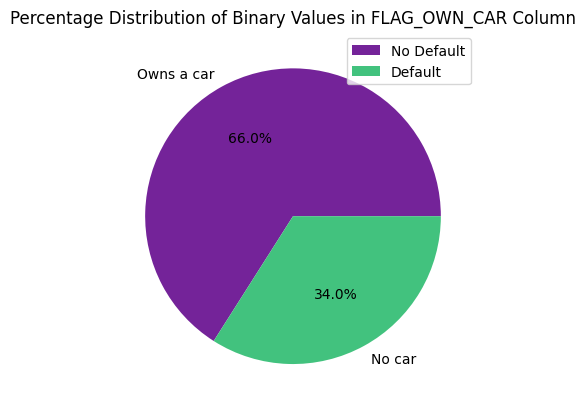

In [38]:
value_counts = df['FLAG_OWN_CAR'].value_counts()

# Create the pie chart
plt.pie(value_counts, labels=['Owns a car', 'No car'], autopct='%1.1f%%', colors = ['#742399',  '#42c27e'])

plt.title('Percentage Distribution of Binary Values in FLAG_OWN_CAR Column')
plt.legend(labels = ['No Default', 'Default'])
plt.show()

In [39]:
flag_Car_Y = df[df['FLAG_OWN_CAR']== 'Y']

In [40]:
flag_Car_Y["OWN_CAR_AGE"]

2         26.0
6         17.0
7          8.0
13        23.0
15        17.0
          ... 
307492     2.0
307494    15.0
307495     2.0
307497     0.0
307498    10.0
Name: OWN_CAR_AGE, Length: 104587, dtype: float64

*Through this visualization below, it is evident that a significant proportion of individuals do not own any cars. Additionally, the majority of cars in the dataset were purchased within the last decade.*

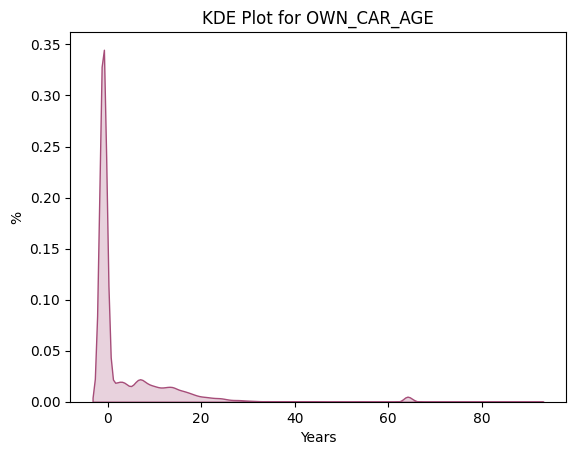

In [41]:
sns.kdeplot(df['OWN_CAR_AGE'], color="#a64d79", fill=True)

plt.title('KDE Plot for OWN_CAR_AGE')
plt.xlabel('Years')
plt.ylabel('%')

plt.show()

<a class="anchor" id="eda1"></a>

## *7.1 Visualization between Family Status and the Target Variable*






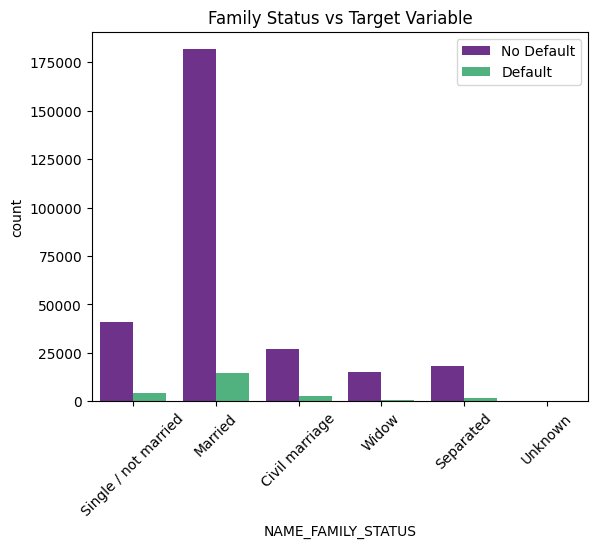

In [42]:
palette = {0: '#742399', 1: '#42c27e'}
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=df, palette = palette)
plt.title("Family Status vs Target Variable")
plt.xticks(rotation = 45)
plt.legend(labels = ['No Default', 'Default'])
plt.show()

From the above plot, we can conclude that Clients who are **'Married'** are the ones who have applied for the loan and also more likely to repay the loan.

<a class="anchor" id="eda2"></a>

## *7.2 Visualization between Housing type and the Target Variable*

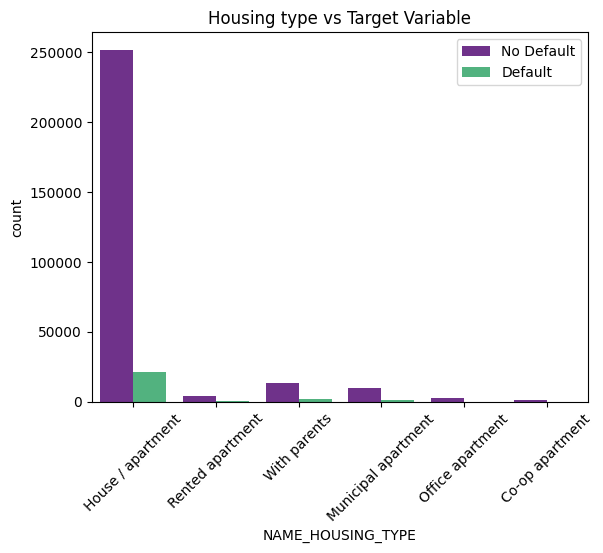

In [43]:
palette = {0: '#742399', 1: '#42c27e'}

sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=df, palette = palette)
plt.title("Housing type vs Target Variable")
plt.xticks(rotation = 45)
plt.legend(labels = ['No Default', 'Default'])
plt.show()


 From the above visualization, we can conclude that Clients having **House/Apartment** are the ones who have applied for the loan and also more likely to repay the loan.

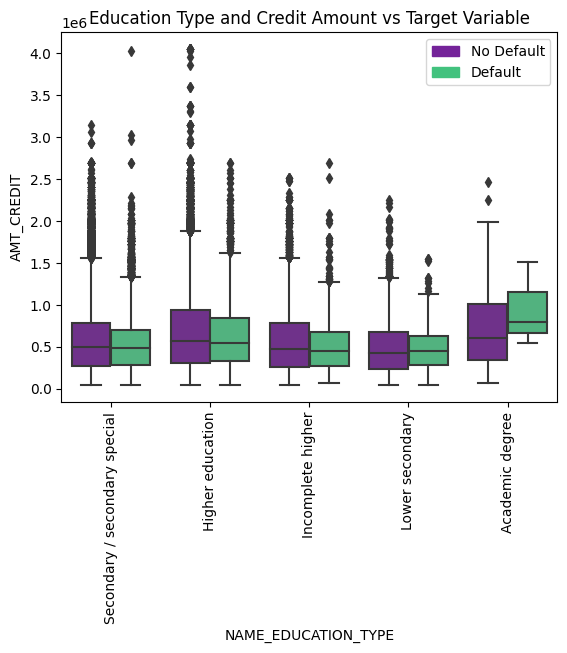

In [44]:
import matplotlib.patches as mp
palette = {0: '#742399', 1: '#42c27e'}
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='TARGET', data=df, palette = palette)

plt.title("Education Type and Credit Amount vs Target Variable")
plt.xticks(rotation = 90)
plt.legend(handles=[mp.Patch(color='#742399', label='No Default'), mp.Patch(color='#42c27e', label='Default')])
plt.show()

***The visualization above helps in analyzing the relationship between education type, credit amount, and the target variable in the given dataset.***

***'Academic Degree' has more defaults for large amount of loans but has the highest repayment probability. 'Lower Secondary' has the lowest amount of loan taken***

<a class="anchor" id="eda3"></a>

## *7.3 Relationship between Income Type and Loan Taken with the Target Varibale (Violin Plot)*

*The plot visualizes the distribution of Clients income type categories who were able to pay the loan they took.*




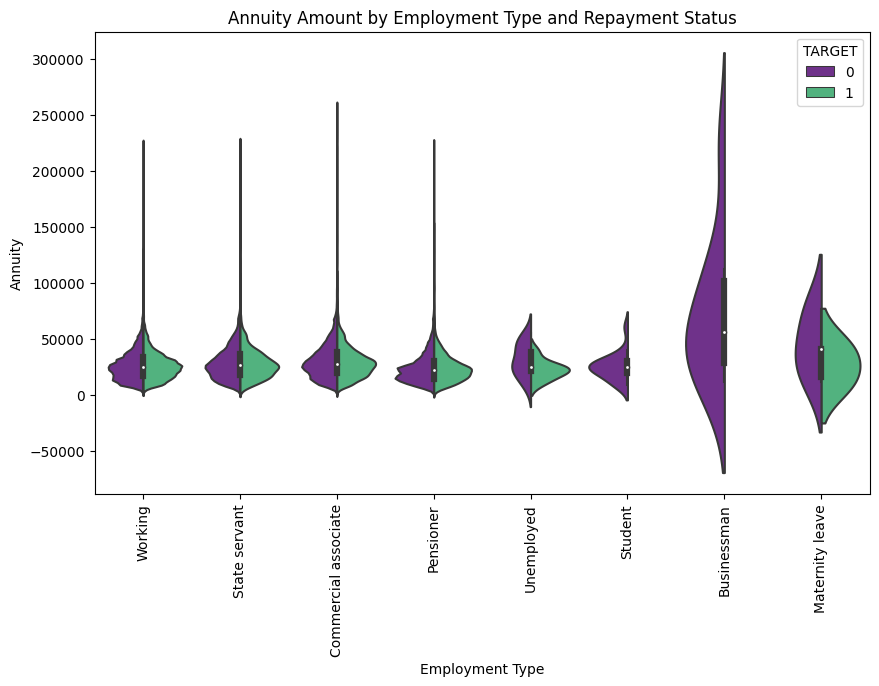

In [45]:
plt.figure(figsize=(10, 6))
palette = {0: '#742399', 1: '#42c27e'}
sns.violinplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', hue='TARGET', data=df, split=True, palette = palette)

plt.title('Annuity Amount by Employment Type and Repayment Status')
plt.xlabel('Employment Type')
plt.ylabel('Annuity')
plt.xticks(rotation=90)

plt.show()

By above visualization we can see that **'Businessman'** clients are the ones who will be repaying the annuity without fail followed by **'Student',** whereas **'Maternity Leave'** class clients are with most defaults

<a class="anchor" id="eda4"></a>

## *7.4 Payment Capability based on Loan and Mortgage*






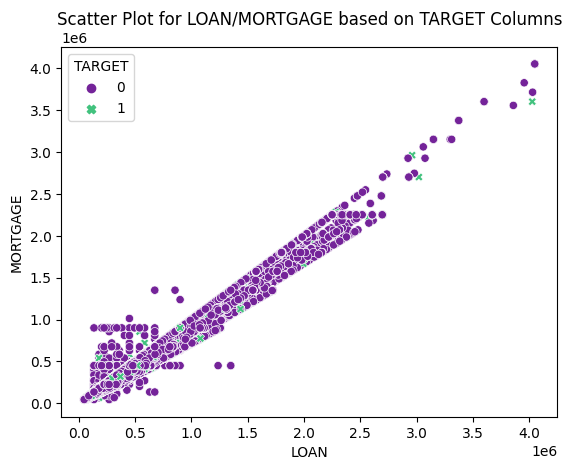

In [46]:
palette = {0: '#742399', 1: '#42c27e'}
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='TARGET', style='TARGET', data=df, palette = palette)

plt.title('Scatter Plot for LOAN/MORTGAGE based on TARGET Columns')
plt.xlabel('LOAN')
plt.ylabel('MORTGAGE')

plt.show()

*From the plot above we can see the relationship between the loan amount and the mortgage with respect to the target. We observe that the default risk is heavily concentrated in the low loan low mortgage range then increases almost linearly*

<a class="anchor" id="kurt"></a>

# **8. Detecting Outliers**

*Kurtosis provides insights into the presence of outliers or extreme values in a dataset.*

In [47]:
kurtosis_values = num_df.kurtosis()

for column in num_df.columns:
    print(f"Kurtosis of column {column}: {kurtosis_values[column]}")

#A high kurtosis value, usually above 0 for excess kurtosis, may indicate the presence of heavy tails in the distribution.
#This suggests that the dataset is more prone to containing outliers or extreme values.

Kurtosis of column CNT_CHILDREN: 7.904106358518466
Kurtosis of column AMT_INCOME_TOTAL: 191786.55438080415
Kurtosis of column AMT_CREDIT: 1.9340413008324937
Kurtosis of column AMT_ANNUITY: 7.707319914804311
Kurtosis of column AMT_GOODS_PRICE: 2.4319164792166954
Kurtosis of column REGION_POPULATION_RELATIVE: 3.2600653343110464
Kurtosis of column DAYS_BIRTH: -1.049125769946035
Kurtosis of column DAYS_EMPLOYED: 0.7716123806586115
Kurtosis of column DAYS_REGISTRATION: -0.3213466019399345
Kurtosis of column DAYS_ID_PUBLISH: -1.1068078939971002
Kurtosis of column OWN_CAR_AGE: 18.65482307314575
Kurtosis of column CNT_FAM_MEMBERS: 2.8019769805254713
Kurtosis of column HOUR_APPR_PROCESS_START: -0.19417286553041757
Kurtosis of column EXT_SOURCE_2: -0.2691308299026067
Kurtosis of column EXT_SOURCE_3: -0.6634630539622144
Kurtosis of column YEARS_BEGINEXPLUATATION_AVG: 248.1763367689516
Kurtosis of column FLOORSMAX_AVG: 2.4325451531730966
Kurtosis of column YEARS_BEGINEXPLUATATION_MODE: 219.9627658

<a class="anchor" id="kurt1"></a>

## *8.1 Visualizing Outliers in Numerical Columns using Boxplots*


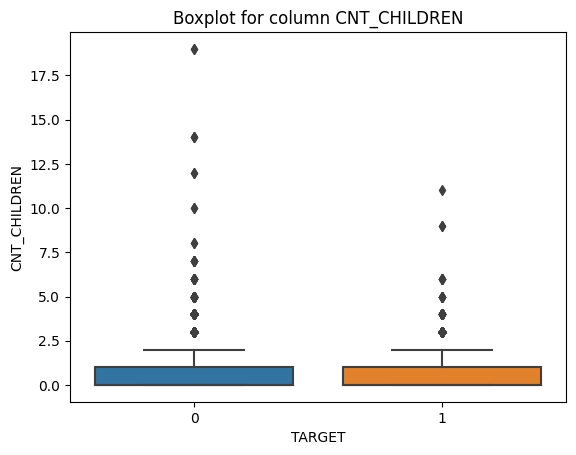

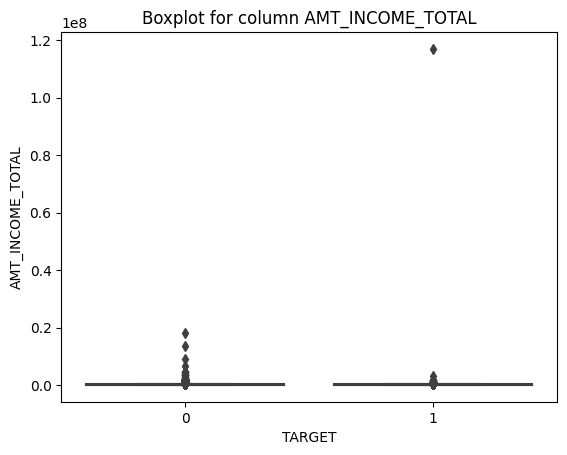

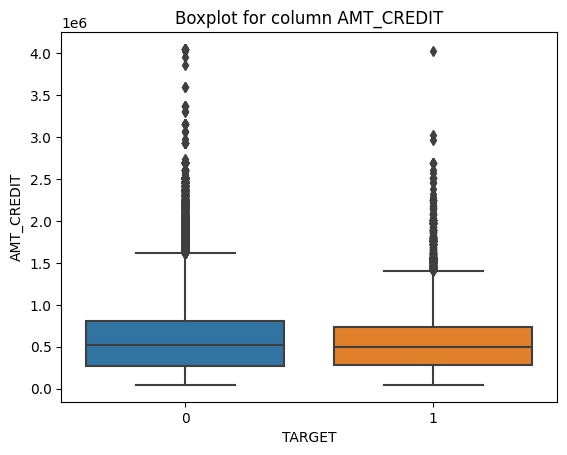

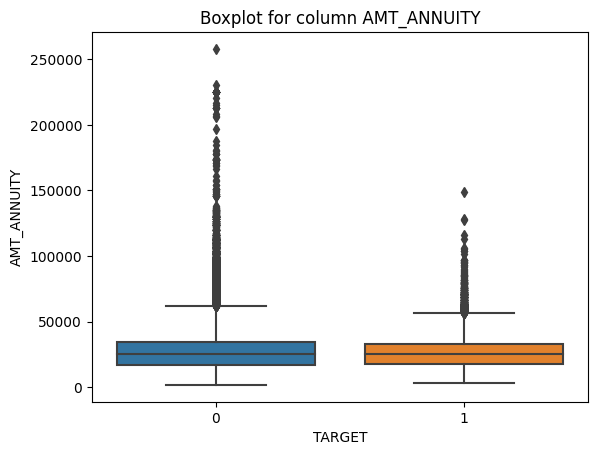

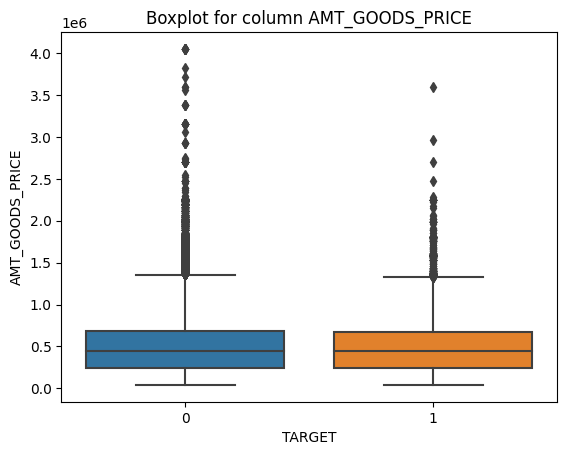

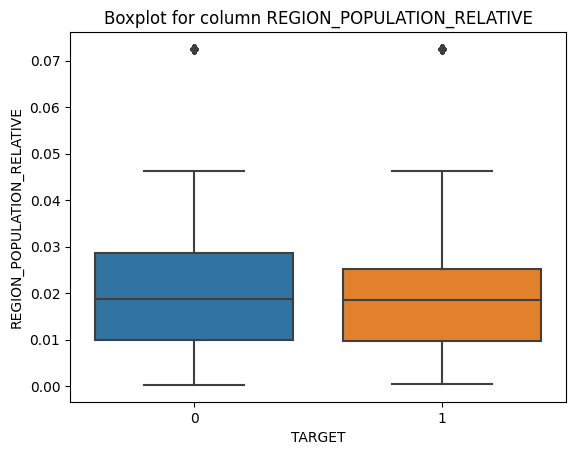

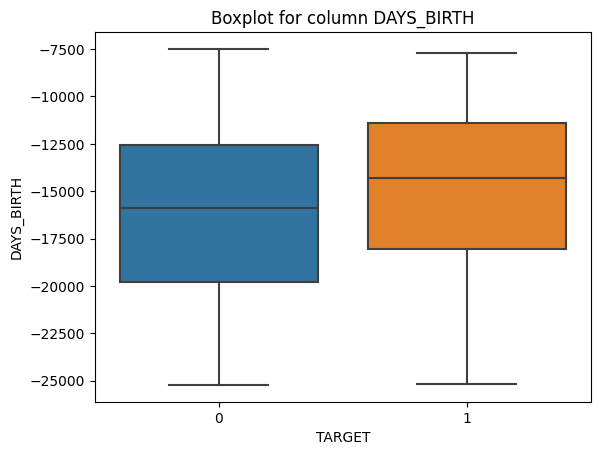

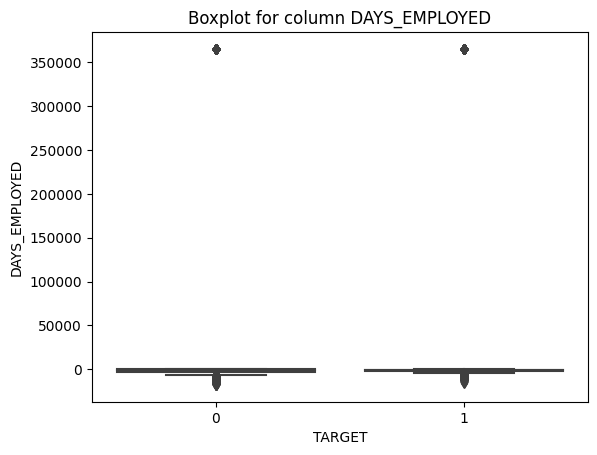

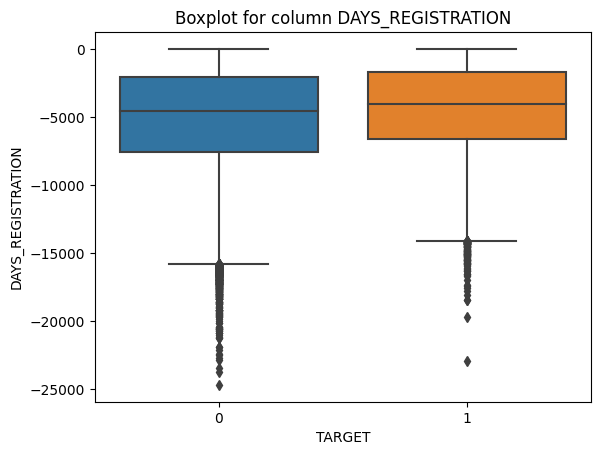

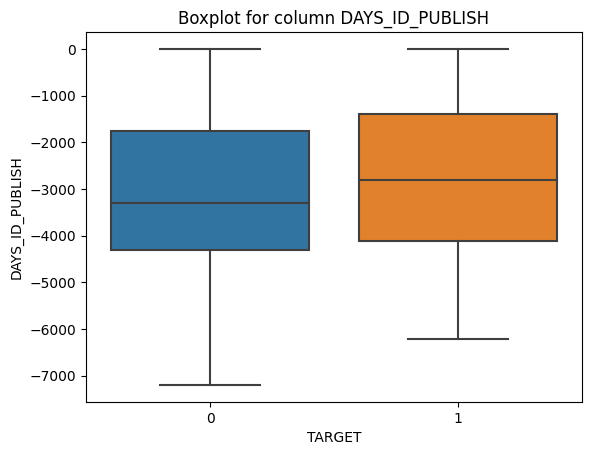

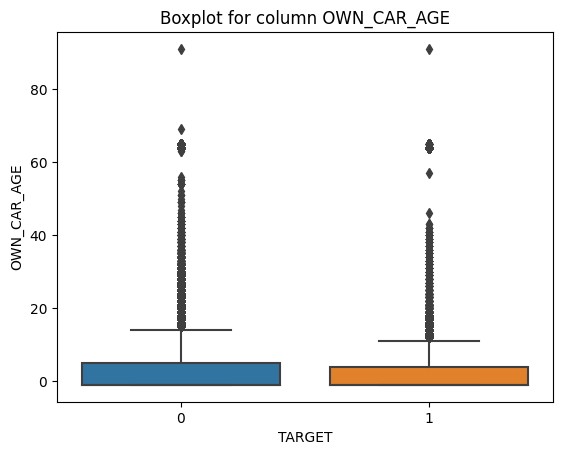

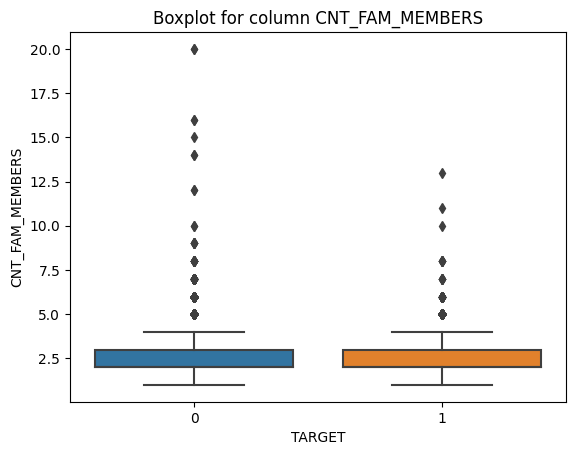

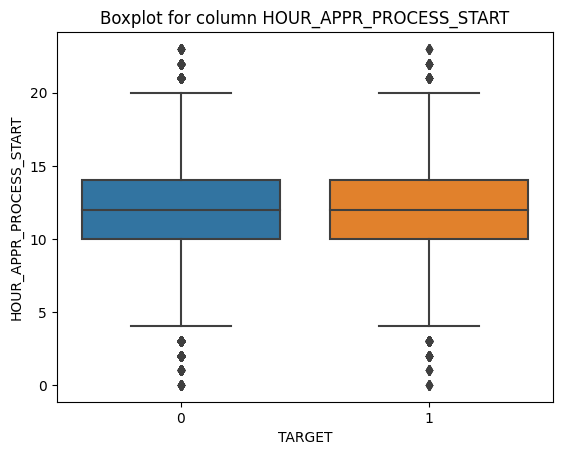

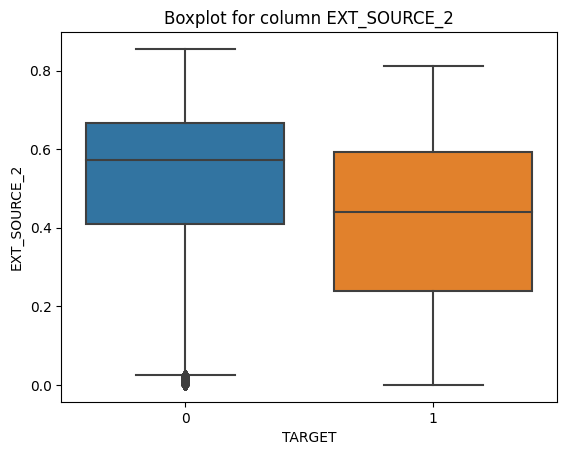

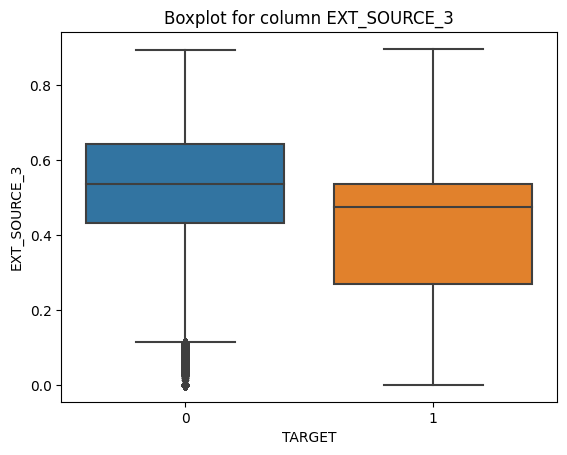

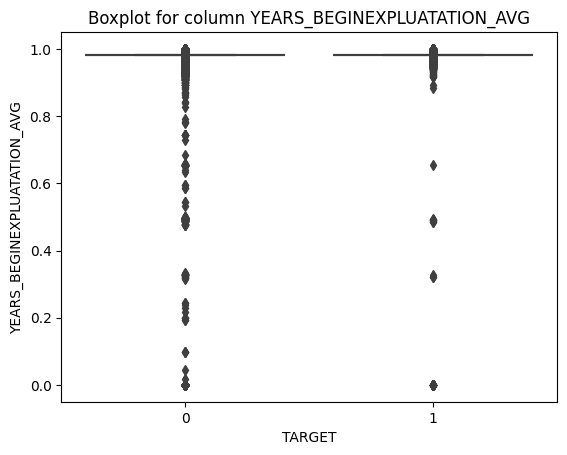

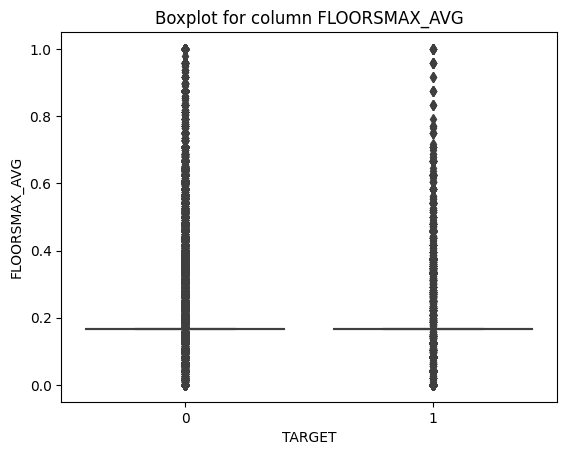

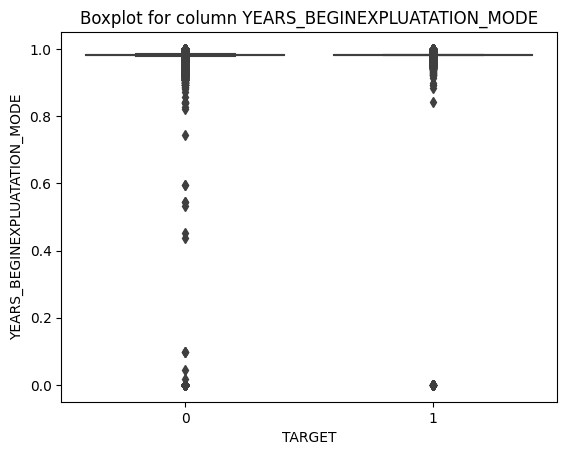

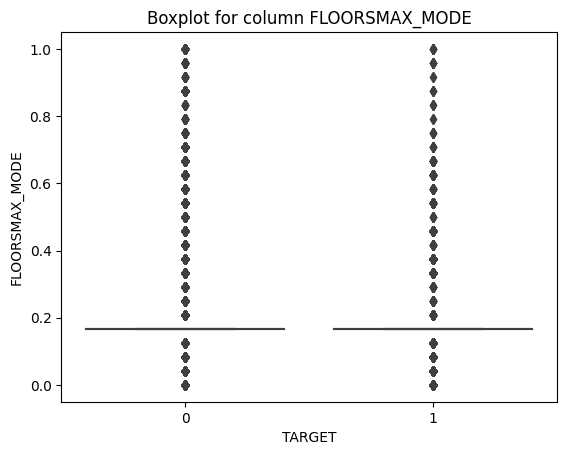

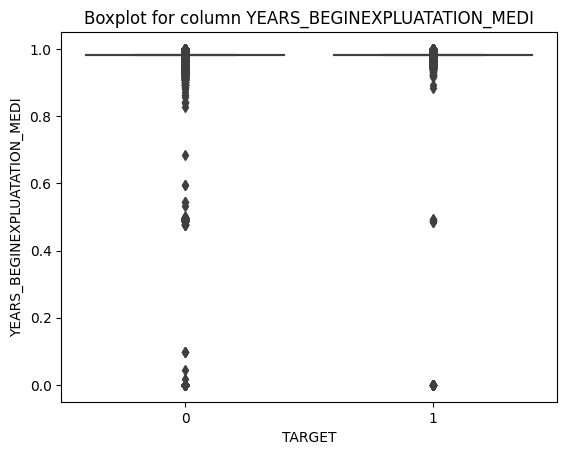

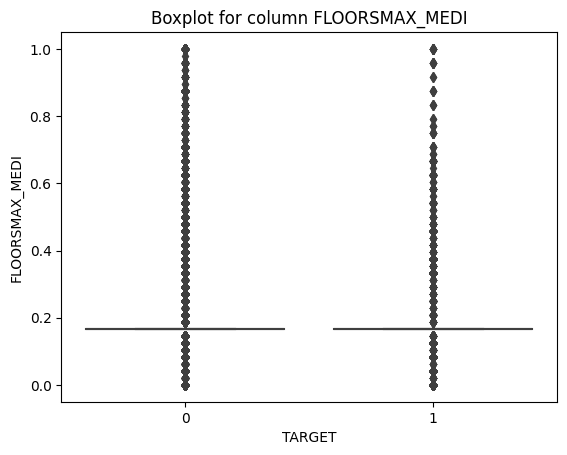

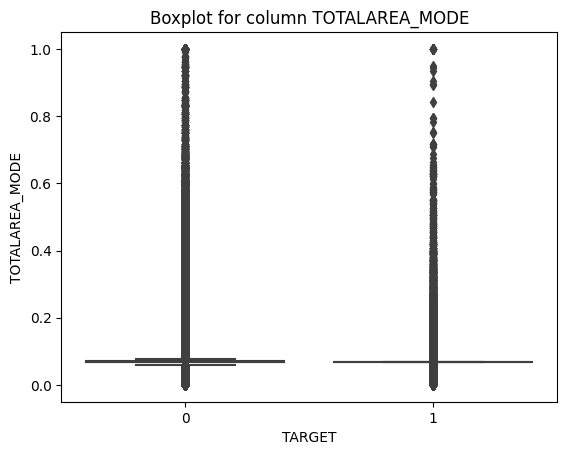

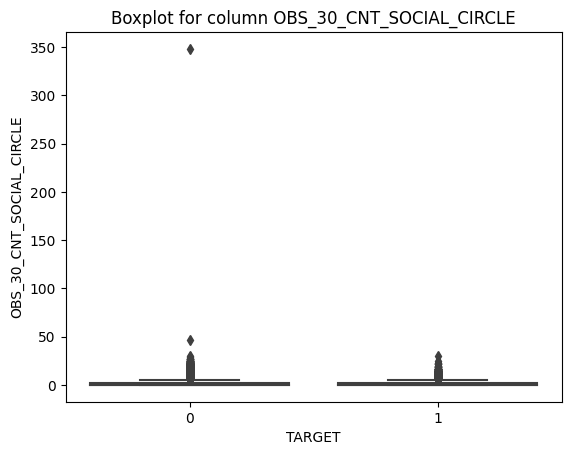

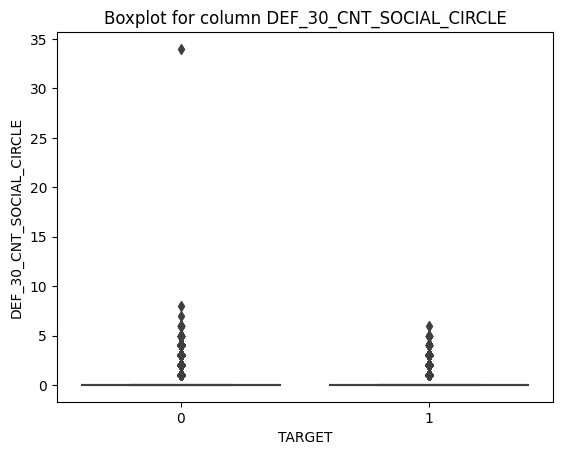

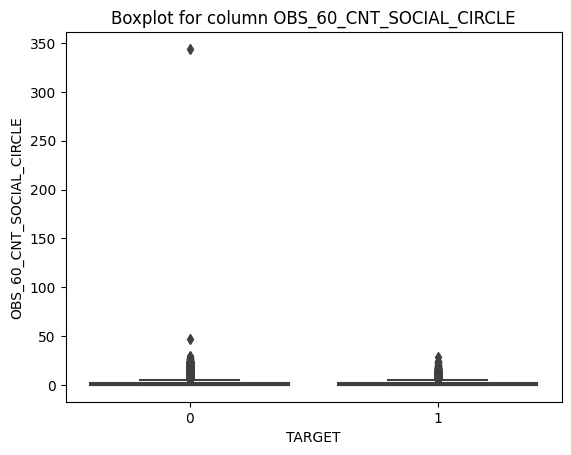

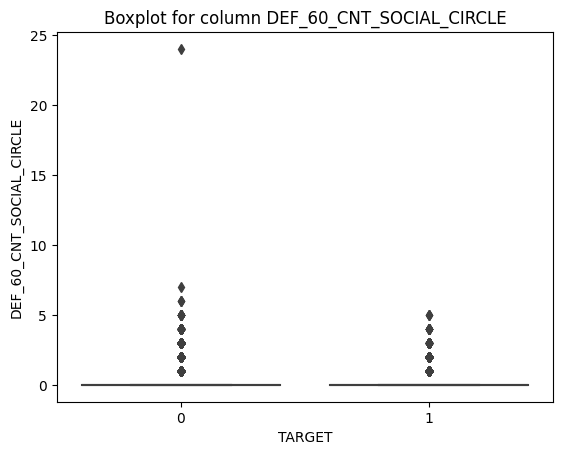

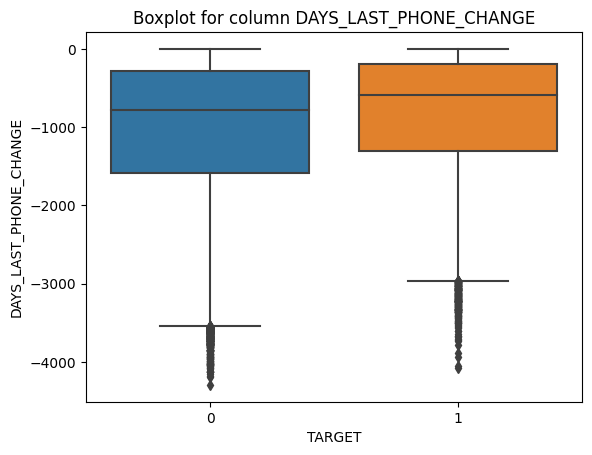

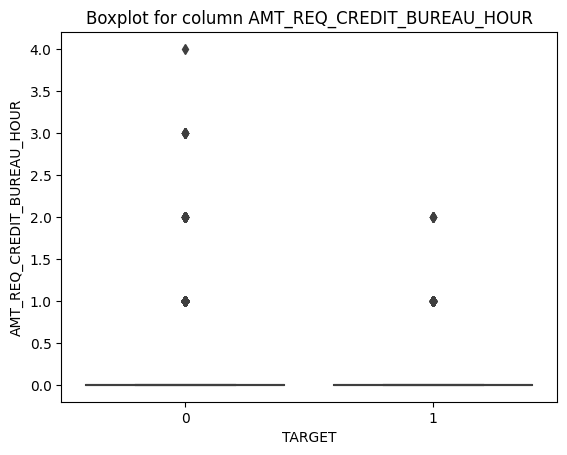

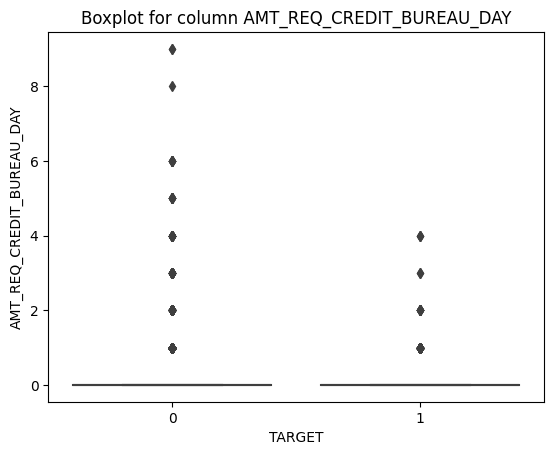

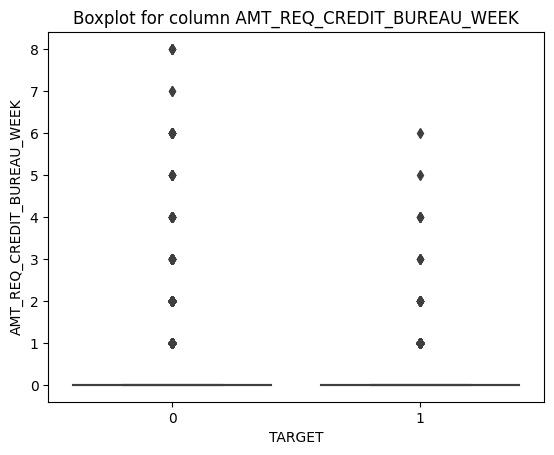

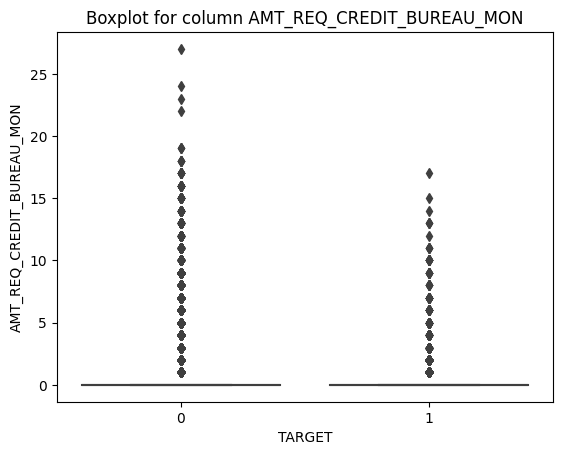

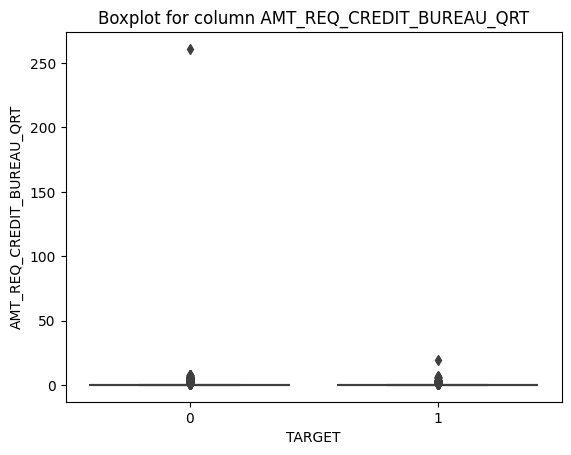

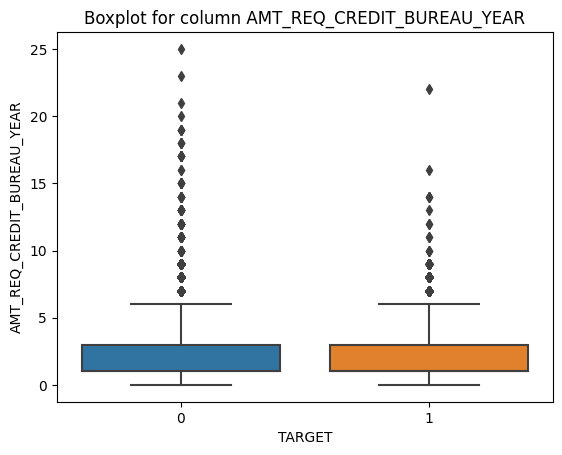

In [48]:
for column in num_cols:
    sns.boxplot(x=df['TARGET'],y=df[column])
    plt.title(f"Boxplot for column {column}")
    plt.show()





**Inferences**

**DAYS_BIRTH:** The people having higher age are having high probability of repayment.

**AMT_INCOME_TOTAL** : The clients having Higher Income are having high probability of repayment.

Some outliers are observed in **'CNT_CHILDREN',  'AMT_CREDIT',  'DAYS_EMPLOYED', 'OWN_CAR_AGE',  'DAYS_REGISTRATION',  'DAYS_LAST_PHONE_CHANGE',    'REGION_RATING_CLIENT'** in the dataset.



<a class="anchor" id="outlier"></a>

# **9. Treatment of Outliers**

*We addressed outliers in the dataset using the Winsorization method.*






**We used Winsorization method because it preserves the overall shape and distribution of your data while reducing the impact of outliers.  Winsorization involves replacing extreme values with less extreme but still reasonable values. The approach entails setting a threshold or percentile, such as the 95th or 99th percentile, and capping or flooring the data at that point.**

In [49]:
from scipy.stats.mstats import winsorize
for column in num_df.columns:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])

<a class="anchor" id="bureau"></a>

# **10 Join application_{train|test}.csv with transactional data**


<a class="anchor" id="bureau1"></a>

## *10.1 Reading in Data*

In [50]:
# Reading in the 'Bureau' dataset
df_bureau = pd.read_csv('bureau.csv')
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


<a class="anchor" id="bureau2"></a>

## *10.2 Observing the Bureau Dataset*

In [51]:
# There are 1716428 rows and 17 columns
print(df_bureau.shape)

(1716428, 17)


In [52]:
# Information about the data types of the columns
print(df_bureau.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


In [53]:
# Descriptive statistics of the numeric columns
print(df_bureau.describe())

         SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+0

In [54]:
# Displaying the number of missing values in each column
print(df_bureau.isnull().sum())

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64


<ipython-input-55-247b538a1997>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_bureau.corr()


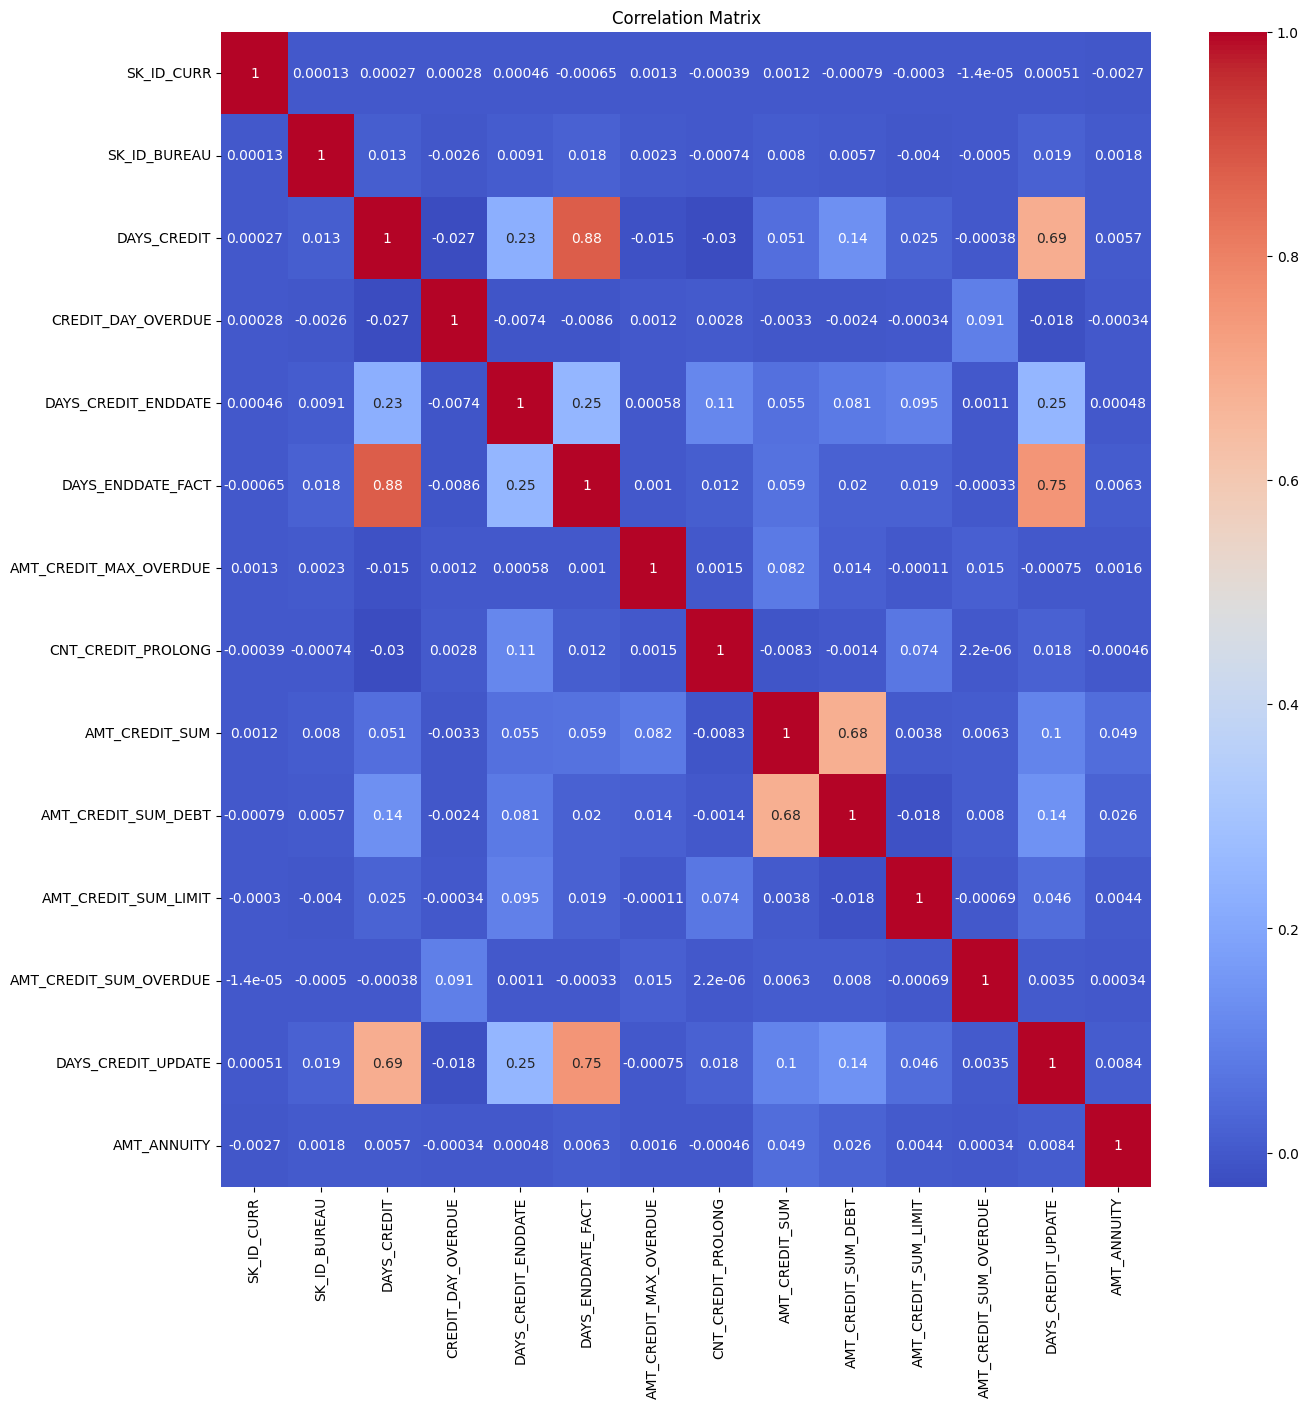

In [55]:
# Displaying a heatmap of the correlation matrix
correlation_matrix = df_bureau.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<a class="anchor" id="bureau3"></a>

## *10.3 Joining Bureau Data with Train Data*

In [56]:
# Joining the data
app_train_bureau = df.merge(df_bureau, on='SK_ID_CURR',how = 'left')

# Displaying the first 5 rows
app_train_bureau.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0.0,40761.0,NaN,NaN,0.0,Credit card,-1038.0,0.0
1,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-48.0,NaN,0.0,0.0,0.0,NaN,0.0,Credit card,-47.0,NaN
2,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0.0,135000.0,0.0,0.0,0.0,Consumer credit,-1185.0,0.0
3,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0.0,19071.0,NaN,NaN,0.0,Consumer credit,-906.0,0.0
4,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0.0,120735.0,0.0,0.0,0.0,Consumer credit,-34.0,0.0


<a class="anchor" id="edabureau"></a>

# **11. Exploring The Joined Transactional Data**

<a class="anchor" id="edabureau1"></a>

## *11.1 Shape of New Dataframe*

In [57]:
# There are 1509345 rows and 98 columns
print(app_train_bureau.shape)

(1509345, 98)


<a class="anchor" id="edabureau2"></a>

##  *11.2 Observing Numerical Columns*

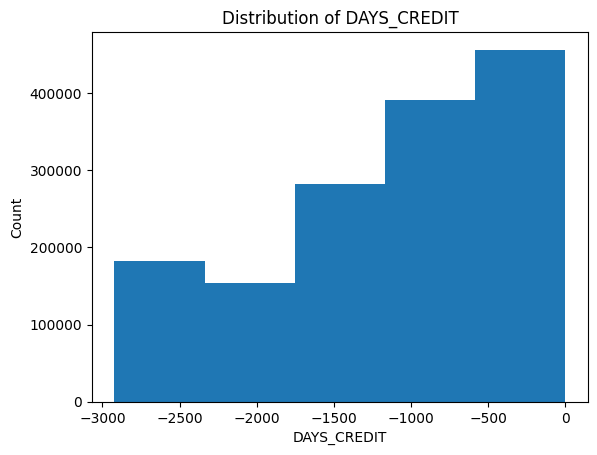

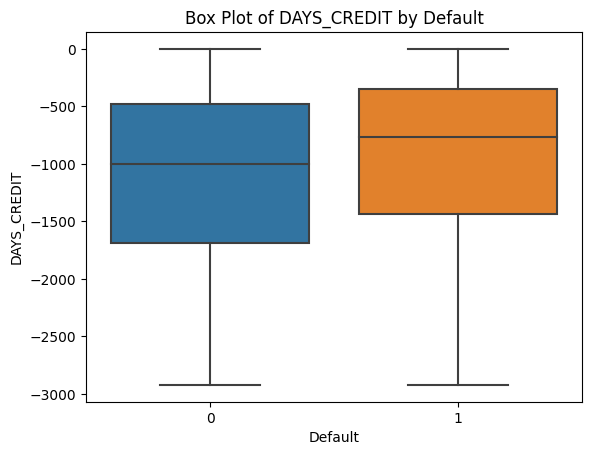

            count         mean         std     min     25%     50%    75%  max
TARGET                                                                        
0       1350805.0 -1157.939253  800.763592 -2922.0 -1692.0 -1004.0 -483.0  0.0
1        114520.0  -974.468591  771.341078 -2922.0 -1433.0  -764.5 -345.0 -1.0


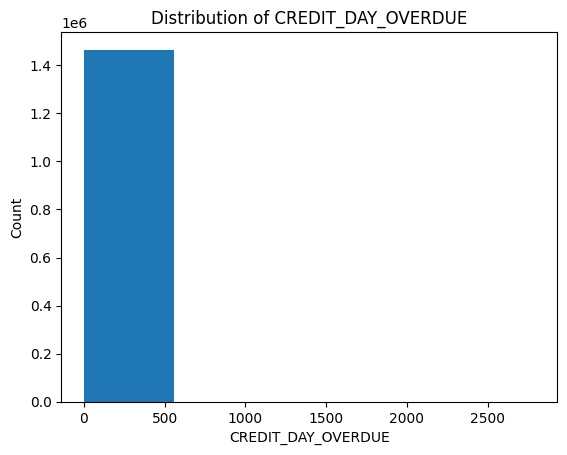

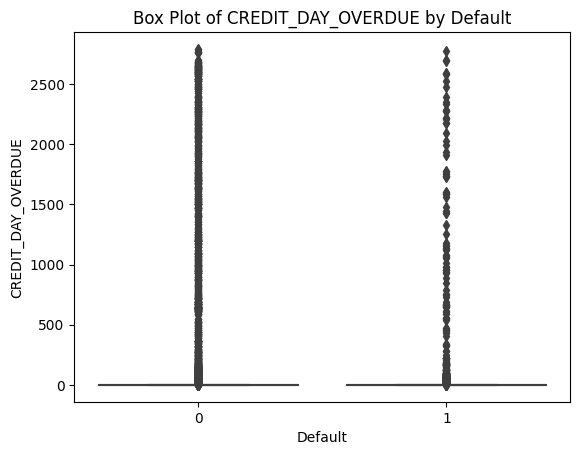

            count      mean        std  min  25%  50%  75%     max
TARGET                                                            
0       1350805.0  0.859229  37.874248  0.0  0.0  0.0  0.0  2792.0
1        114520.0  1.237103  42.396602  0.0  0.0  0.0  0.0  2776.0


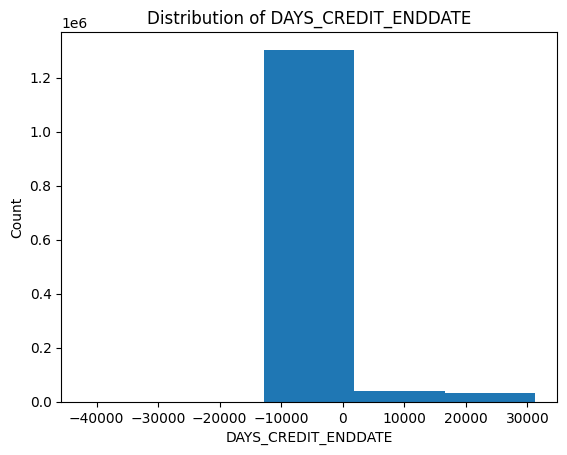

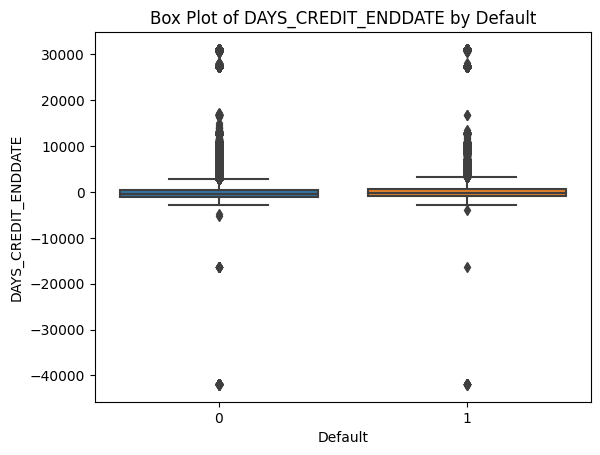

            count        mean          std      min     25%    50%    75%  \
TARGET                                                                      
0       1271015.0  455.282841  4897.297009 -42056.0 -1162.0 -353.0  446.0   
1        105212.0  950.371840  5699.043528 -42060.0  -910.0 -120.0  735.0   

            max  
TARGET           
0       31199.0  
1       31198.0  


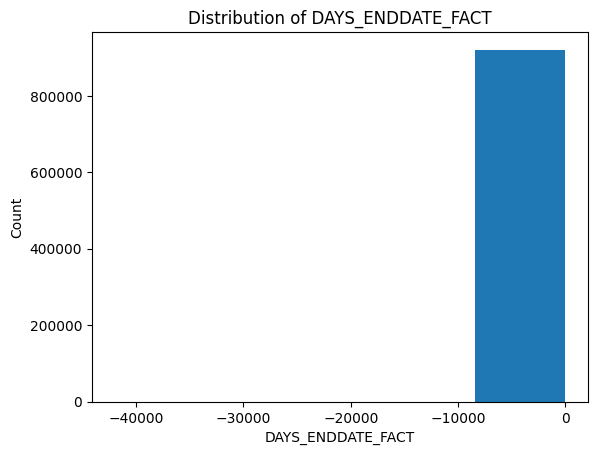

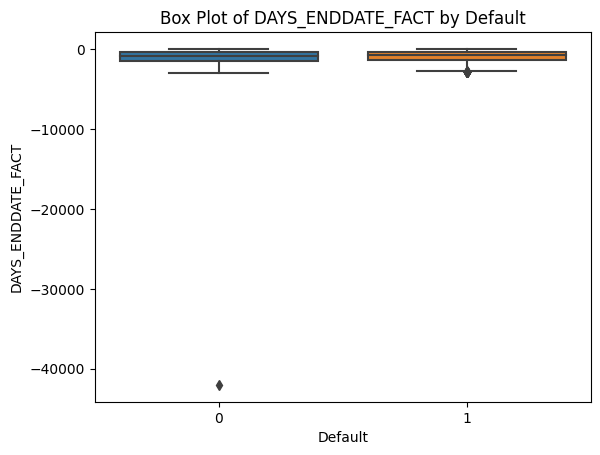

           count         mean         std      min      25%    50%    75%  max
TARGET                                                                        
0       856756.0 -1030.427522  719.217876 -42023.0 -1514.00 -908.0 -434.0  0.0
1        63896.0  -920.025416  698.865466  -2917.0 -1335.25 -767.0 -345.0  0.0


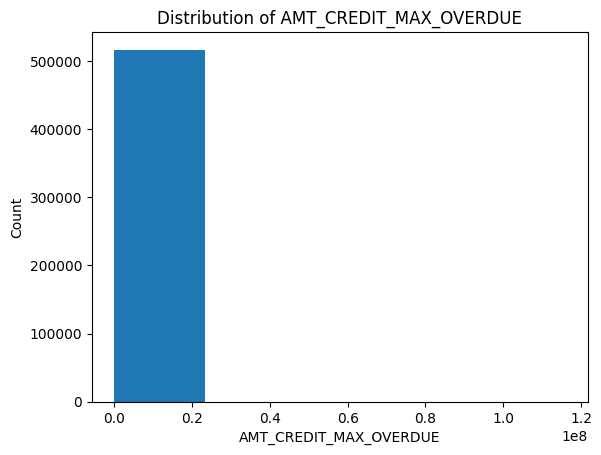

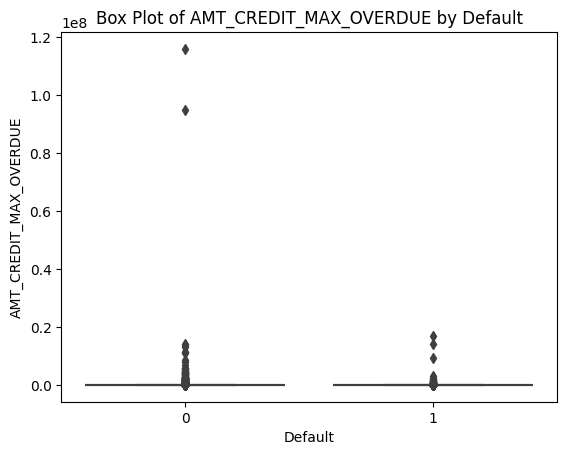

           count         mean            std  min  25%  50%       75%  \
TARGET                                                                  
0       475496.0  3840.144965  226148.894461  0.0  0.0  0.0   0.00000   
1        41284.0  5125.800763  122767.985152  0.0  0.0  0.0  35.29125   

                max  
TARGET               
0       115987185.0  
1        16950010.5  


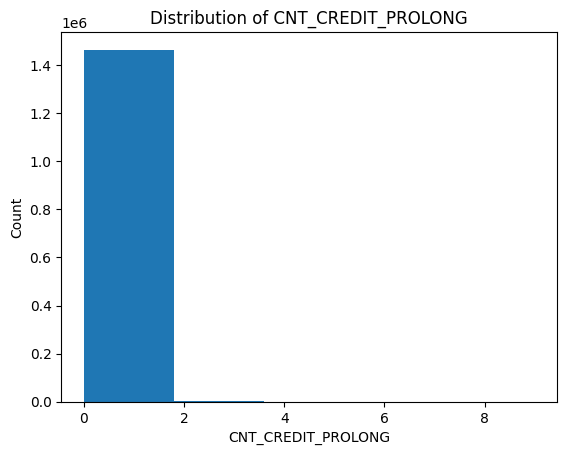

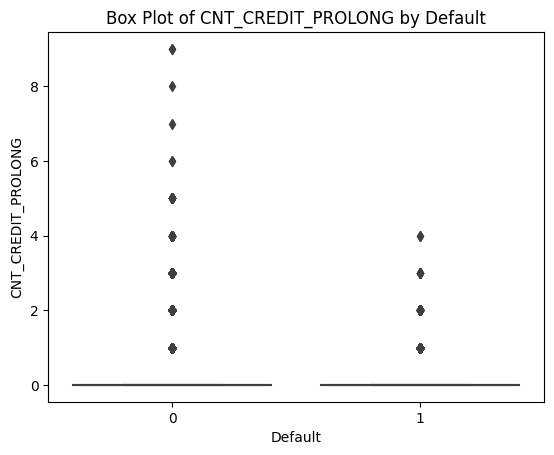

            count      mean       std  min  25%  50%  75%  max
TARGET                                                        
0       1350805.0  0.007233  0.102794  0.0  0.0  0.0  0.0  9.0
1        114520.0  0.007815  0.100818  0.0  0.0  0.0  0.0  4.0


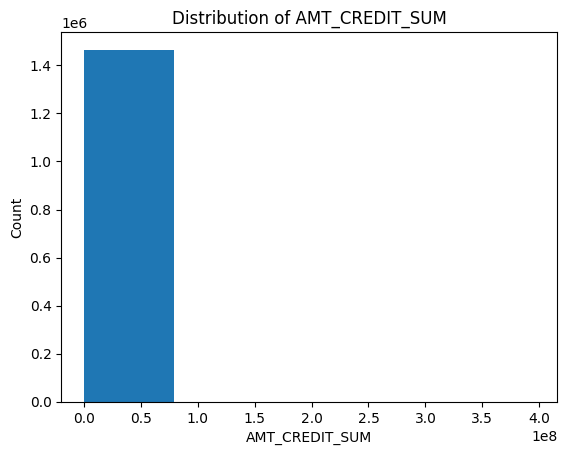

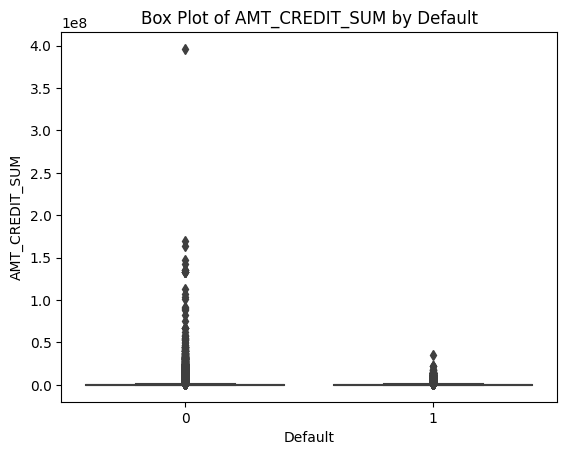

            count           mean           std  min       25%          50%  \
TARGET                                                                       
0       1350802.0  355017.990578  1.104648e+06  0.0  51660.00  125206.4025   
1        114520.0  312420.725270  6.889266e+05  0.0  45764.19  119880.0000   

               75%          max  
TARGET                           
0       309237.750  396000000.0  
1       299622.375   35190000.0  


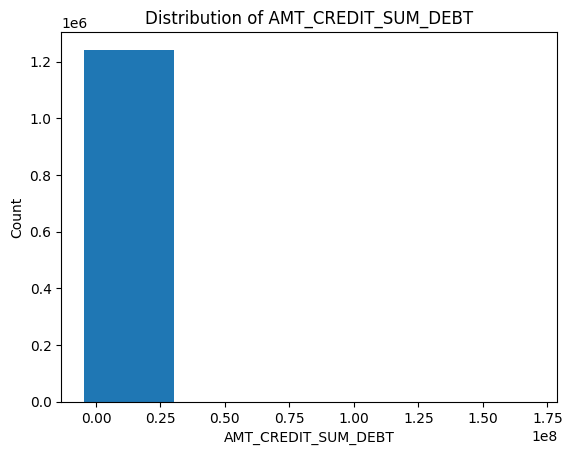

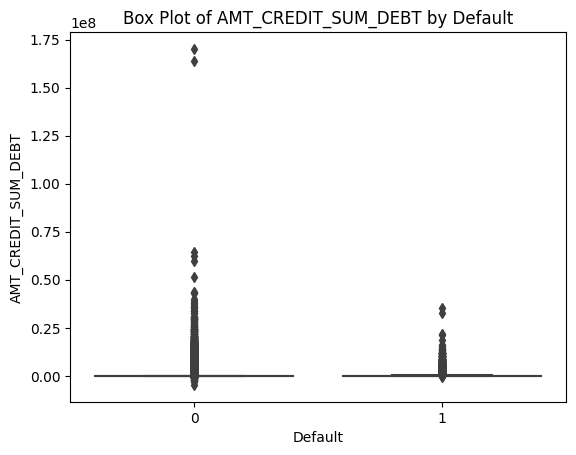

            count           mean            std         min  25%  50%  \
TARGET                                                                  
0       1144386.0  135387.362367  686127.228872 -4705600.32  0.0  0.0   
1         97845.0  141756.601776  538380.247952  -414000.00  0.0  0.0   

            75%          max  
TARGET                        
0       34812.0  170100000.0  
1       86157.0   35108518.5  


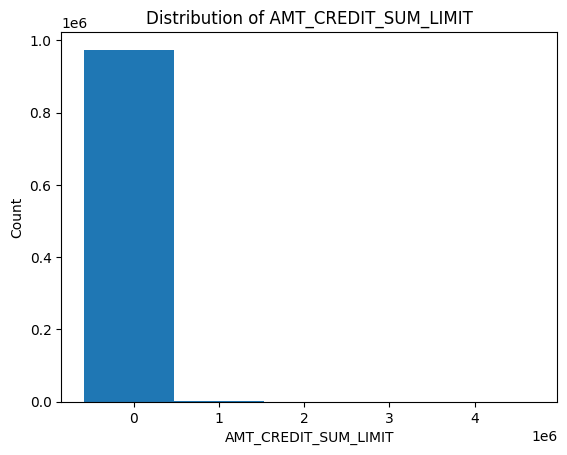

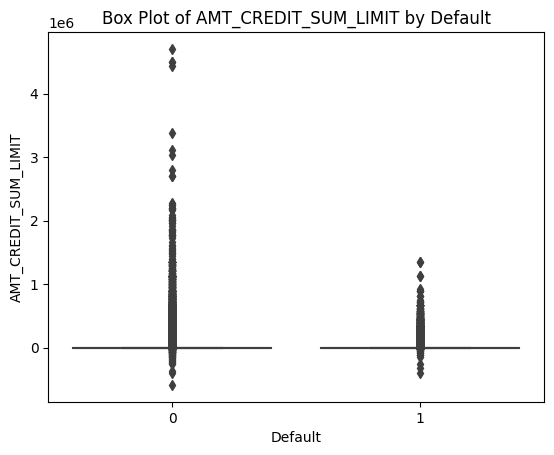

           count         mean           std         min  25%  50%  75%  \
TARGET                                                                   
0       899469.0  6442.901421  46083.332444 -586406.115  0.0  0.0  0.0   
1        76186.0  5428.470023  36982.751089 -401346.945  0.0  0.0  0.0   

               max  
TARGET              
0       4705600.32  
1       1350000.00  


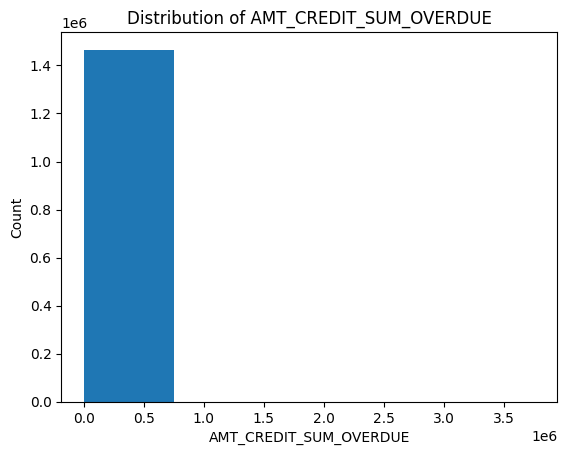

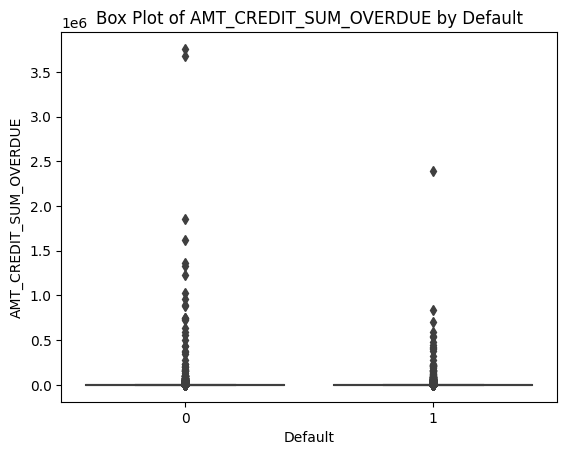

            count        mean          std  min  25%  50%  75%        max
TARGET                                                                   
0       1350805.0   28.682461  5934.185099  0.0  0.0  0.0  0.0  3756681.0
1        114520.0  174.843954  9392.520309  0.0  0.0  0.0  0.0  2387232.0


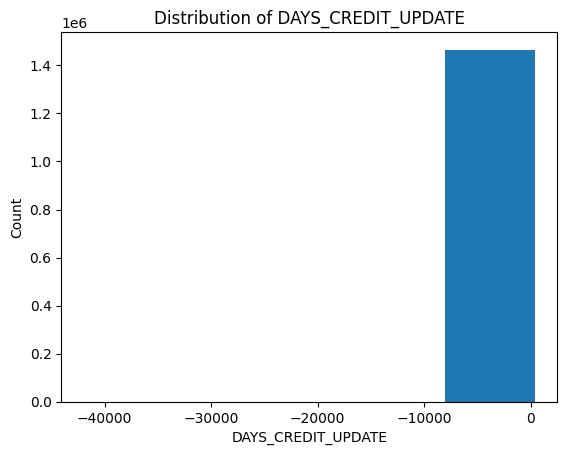

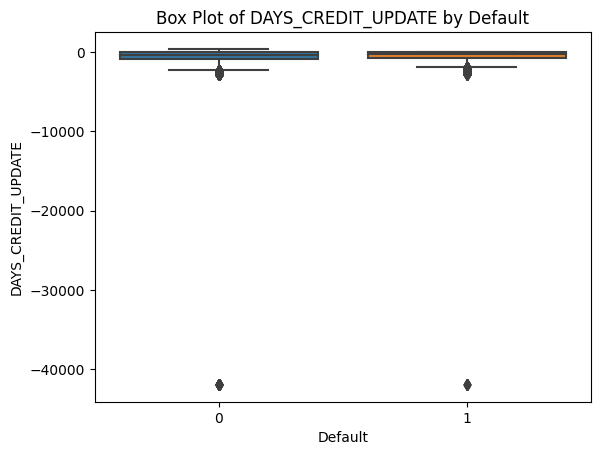

            count        mean         std      min    25%    50%   75%    max
TARGET                                                                       
0       1350805.0 -608.602741  735.055632 -41947.0 -914.0 -421.0 -35.0  372.0
1        114520.0 -495.800943  753.066938 -41933.0 -764.0 -229.0 -24.0   22.0


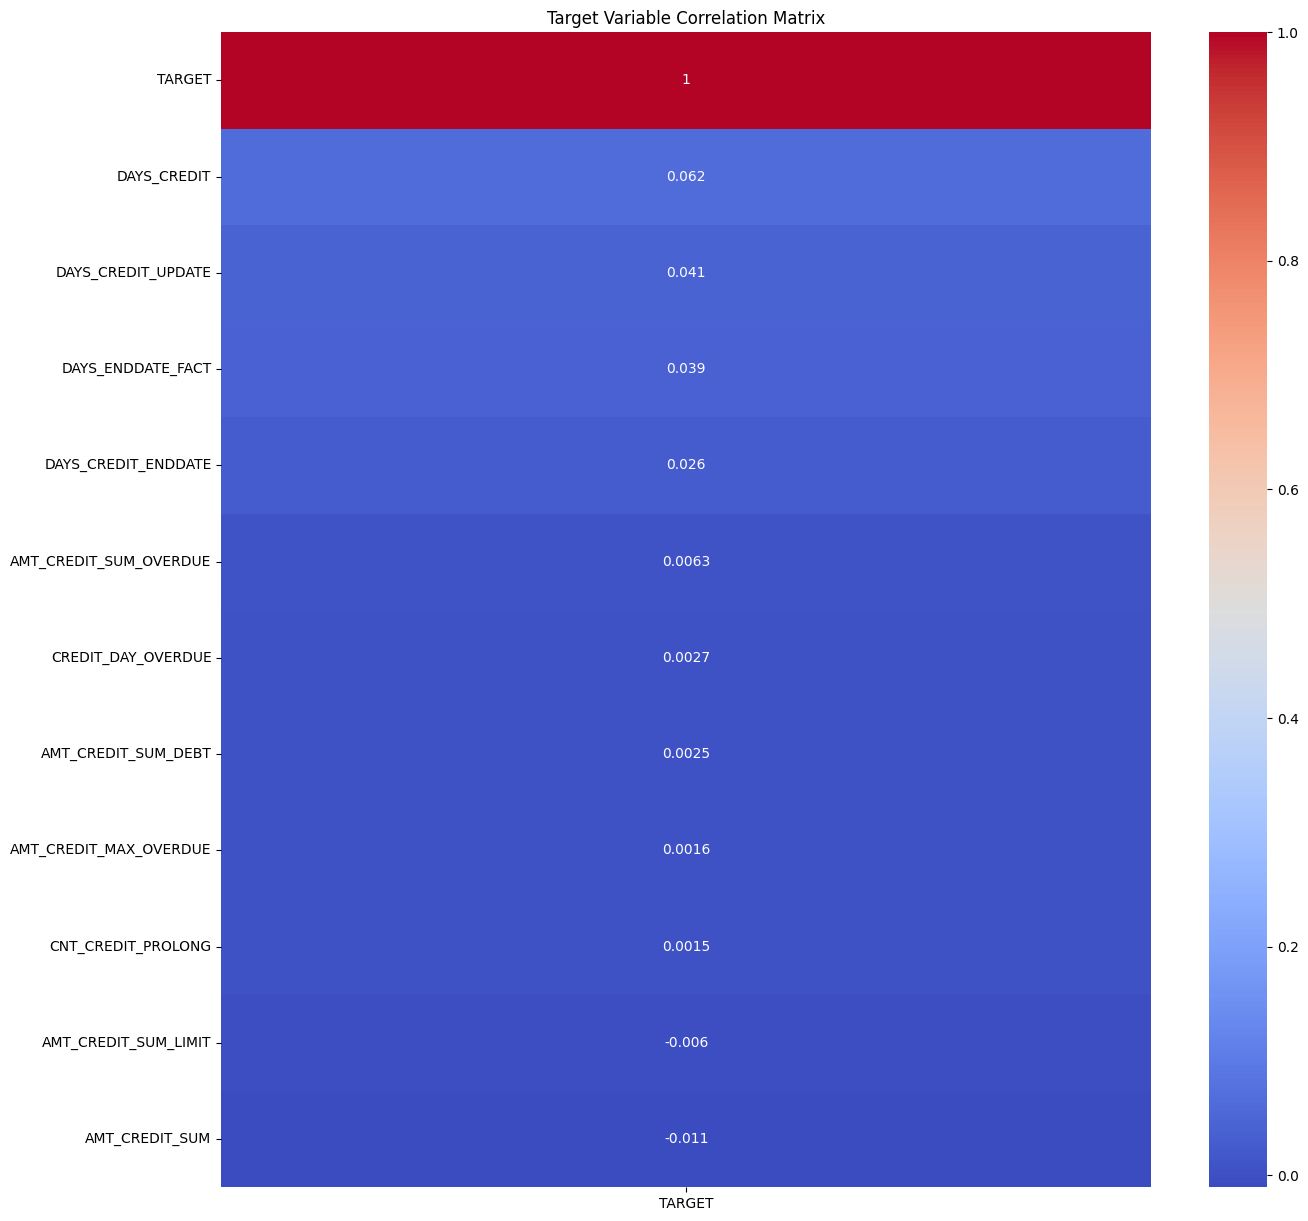

In [58]:
# Analyze numerical columns
numerical_columns = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
                    'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
                     'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
                    'DAYS_CREDIT_UPDATE']

for column in numerical_columns:
    # Plot histogram
    plt.hist(app_train_bureau[column], bins=5)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

    # Box plot
    sns.boxplot(x='TARGET', y=column, data=app_train_bureau)
    plt.xlabel('Default')
    plt.ylabel(column)
    plt.title(f'Box Plot of {column} by Default')
    plt.show()

    # Summary statistics
    stats_by_default = app_train_bureau.groupby('TARGET')[column].describe()
    print(stats_by_default)

# Investigate correlations
correlation_matrix = app_train_bureau[numerical_columns + ['TARGET']].corr()
target_correlation_matrix = correlation_matrix['TARGET']
sorted_correlation = target_correlation_matrix.sort_values(ascending=False)
plt.figure(figsize=(15, 15))
sns.heatmap(sorted_correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Target Variable Correlation Matrix')
plt.show()

<a class="anchor" id="edabureau3"></a>

## *11.3 Observing Categorical Columns*

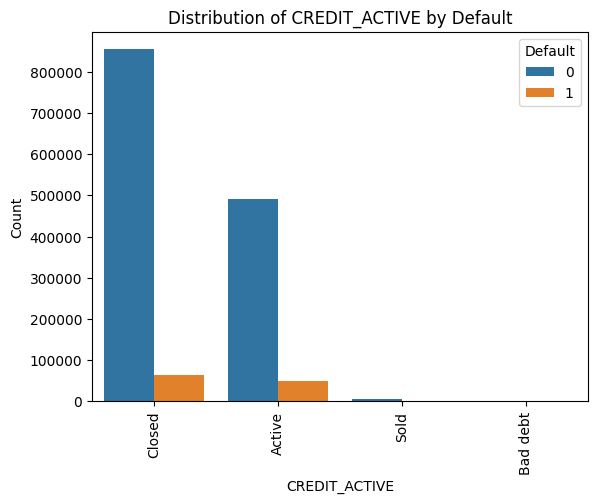

CREDIT_ACTIVE
Active       9.288473
Bad debt    20.000000
Closed       6.931101
Sold        10.100831
Name: TARGET, dtype: float64


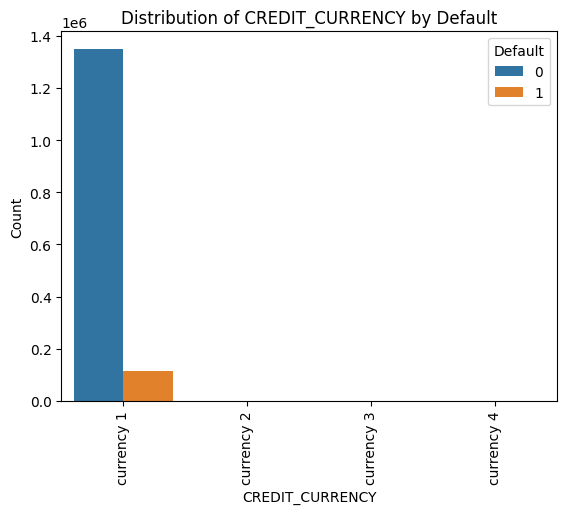

CREDIT_CURRENCY
currency 1     7.817394
currency 2     4.570896
currency 3    11.333333
currency 4     0.000000
Name: TARGET, dtype: float64


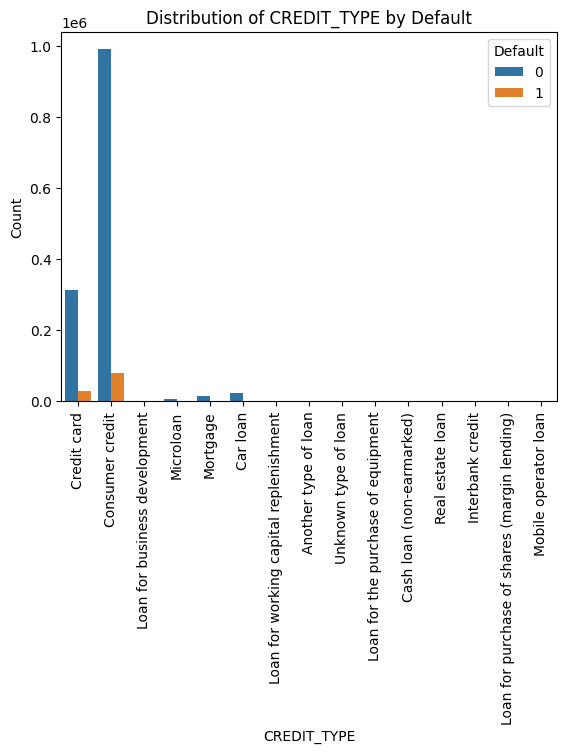

CREDIT_TYPE
Another type of loan                             7.142857
Car loan                                         5.573094
Cash loan (non-earmarked)                        4.347826
Consumer credit                                  7.483662
Credit card                                      8.800854
Interbank credit                                 0.000000
Loan for business development                    6.159210
Loan for purchase of shares (margin lending)     0.000000
Loan for the purchase of equipment              23.529412
Loan for working capital replenishment          12.732095
Microloan                                       20.644087
Mobile operator loan                             0.000000
Mortgage                                         4.997757
Real estate loan                                 0.000000
Unknown type of loan                             6.144068
Name: TARGET, dtype: float64


In [59]:
# Visualize categorical columns
categorical_columns = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

for column in categorical_columns:
    # Bar plot
    sns.countplot(x=column, hue='TARGET', data=app_train_bureau)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column} by Default')
    plt.xticks(rotation=90)
    plt.legend(title='Default')
    plt.show()

    # Percentage of defaults within each category
    defaults_by_category = app_train_bureau.groupby(column)['TARGET'].mean() * 100
    print(defaults_by_category)



<a class="anchor" id="questions"></a>

# **12. Questions**

**QUESTIONS**

1.   Some columns were important and had missing values more than 50%. I used imputation technique for that but still the question is whether is it the right approach as imputation will lead to biased-data.
2.   Treatment of outliers, I used winsorization method as it lowers the impact of outliers and preserves the overall shape. However z-score is another method to treat outliers. So the question is which method would be more effective since z-score treats categorical and numerical data in same way?
3. Correlation analyss shows a high absolute value on variables EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. Do we need to add these as predictors on our analysis? What do these variables mean to our analysis?



<a class="anchor" id="results"></a>

# **13. Results**

The correlation analysis shows that the Banks should focus more on contract type ‘Student’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

The Bureau dataset has 7 columns with missing values with AMT_ANNUITY and AMT_CREDIT_MAX_OVERDUE missing the most. People with difficulty making payments have applied for Credit Bureau credit more recently to current application (DAYS_CREDIT) than those who dont. The highest percentage of Status of the Credit Bureau reported credits (CREDICT_ACTIVE) is 'bad debt' and 'sold.' The highest percentage of Recoded currency of the Credit Bureau credit (CREDIT_CURRENCY) is 'currency 3' and 'currency 1.' Lastly, the highest percentage of Type of Credit Bureau credit (CREDIT_TYPE) is 'loan for the purchase of equipment' and 'microloan.' In general, the Bureau dataset doesnt seem to have many strong fields in predicting default besides the DAYS_CREDIT field.


During the exploratory data analysis (EDA), we encountered several tasks related to outliers and missing values. Firstly, we identified columns with no significant relevance and more than 50% missing data. Consequently, we made the decision to drop these columns from the dataset. For the remaining columns with 50% or less missing data, we employed imputation techniques to handle the missing values effectively. Finally, to address the outliers in the dataset, we utilized the Winsorization method. In conclusion, our approach involved dropping irrelevant columns with extensive missing data, imputing missing values in columns with moderate missing data, and applying the Winsorization method for outlier treatment.

**Conclusion** - With the help of EDA, I found strong relationship between **AMT_CREDIT, AMT_ANNUITY, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE** with the **TARGET** Variable.

<a class="anchor" id="summary"></a>

# **14. Summary**

The Home Credit Default Risk project dataset, provides a rich source of data for conducting an in-depth Exploratory Data Analysis (EDA). This EDA project aims to gain insights into the data and understand the relationships between various variables in order to derive meaningful conclusions.

Further analysis involves exploring the relationships between different variables using correlation matrices, scatter plots, and heatmaps. This helps in identifying potential associations and dependencies among the variables.

Additionally, the project examines the relationship between the target variable and various features through visualizations and statistical tests. Insights gained from this analysis can help in understanding which factors are most influential in determining the target variable.

Overall, this EDA project on Home Credit's dataset provides a comprehensive analysis of the data, uncovering patterns, relationships, and potential areas of interest for further analysis and modeling. The insights gained from this EDA can serve as a solid foundation for building predictive models or developing strategies for credit risk assessment.

<a class="anchor" id="contrib"></a>

# **15. Contributions**

<a class="anchor" id="contrib1"></a>

## *15.1 Daryle Bilog*

I explored the correlations between other varibales within the train dataset. Created some visualizations for better understanding. Cleaned up the notebook and created the Table of Contents.


<a class="anchor" id="contrib2"></a>

## *15.2 Joe Sarnello*

I joined the Train dataset with the Bureau dataset and then explored the joined transactional data (Sections 10 and 11). I also put those results in the results section.

<a class="anchor" id="contrib3"></a>

## *15.3 Sanskriti Bhargava*

I worked on  the scope of missing data and outliers. Also proposed solution to it. Further, I worked on Exploratory visualizations and summary tables.

<a class="anchor" id="contrib4"></a>

## *15.4 Vinay Kumar Vascuri*

I have done the exploration part of TARGET variable,finding Target variable's Accuracy & relationship between Target and predictors. Created and Summarized the Insights to various Visualizations for a better understanding.


**END**